# Машинное обучение, ФКН ВШЭ

# Практическое задание 11. Несбалансированные задачи

## Общая информация
Дата выдачи: 23.04.2024

Мягкий дедлайн: 17.05.2024 23:59 MSK

Жесткий дедлайн: 19.05.2024 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-xx-Username.ipynb

Username — ваша фамилия и имя на латинице именно в таком порядке

## О задании

В этом задании мы разберем основные техники работы в задачах, где один из классов занимает существенно меньшую долю выборки, чем остальные. Для простоты мы обойдемся бинарной задачей, тем не менее, во многом данные методы можно перенести и на задачи с б**о**льшим числом классов. Кроме того, вы получите очередной бесценный опыт исследования случайной библиотеки случайных индусов с нуля.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from tqdm.auto import tqdm

c:\Users\Настя\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


**Задание -1 (1 балл)**. EDA

В качестве данных для нашей работы возьмем выложенный на kaggle датасет транзакций, в котором нужно выискивать мошеннические проводки: [клик](https://www.kaggle.com/mlg-ulb/creditcardfraud). Данная задача по определению подходит под несбалансированную, что можно сказать даже без наличия каких-либо данных (понятно, что среди всех транзакций клиентов очень малая часть будет мошеннической).

Загрузим данные, проведем некоторые классические манипуляции.

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Наши данные были анонимизированы. Мы имеем 30 признаков, из которых 28 - это результаты PCA-преобразования на исходном датасете. Еще 2 признака представляют собой время в секундах, прошедшее с момента первой транзакции в датасете, и размер транзакции. Скажите, какова доля положительных объектов в выборке?

In [4]:
# процент положительных объектов в выборке:
df.Class.value_counts()[1]/df.Class.values.shape[0]

0.001727485630620034

Начнем с обработки времени. Секунды сами по себе не несут большой информации о зависимостях в данных, попробуйте по ним создать признаки "час" (от 0 до 23) и "день" (от 0 до ...) в аналогичной манере (принимая первый объект выборки за начальную точку). Сколько дней покрывают данные?

In [5]:
# создаём признаки "час" и "день"
df['days'] = df['Time'] // 86400
df['hours'] = (df['Time'] // 3600) % 24

In [6]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,days,hours
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,1.0,23.0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,1.0,23.0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,1.0,23.0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,1.0,23.0


Постройте следующие графики:

1. Распределение числа транзакций по каждому часу (line-plot).
2. Распределение доли мошеннических транзакций по каждому часу (line-plot)
3. То же самое для дней (здесь можно использовать bar-plot, так как дней должно быть немного).

Какие выводы можно сделать из графиков? На ваш взгляд, как можно связать полученные нами часы с реальными часами в сутках?

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

sns.set(style='darkgrid', palette='deep')

plt.rcParams['font.size'] = 16
plt.rcParams['savefig.format'] = 'pdf'

In [8]:
df_0 = df[df['Class'] == 0]
df_1 = df[df['Class'] == 1]

hourly_counts = df['hours'].value_counts().reset_index()
hourly_counts.columns = ['hours', 'count']

a_hourly_counts = df_1['hours'].value_counts().reset_index()
a_hourly_counts.columns = ['hours', 'count']

days_counts = df['days'].value_counts().reset_index()
days_counts.columns = ['days', 'count']

a_days_counts = df_1['days'].value_counts().reset_index()
a_days_counts.columns = ['days', 'count']

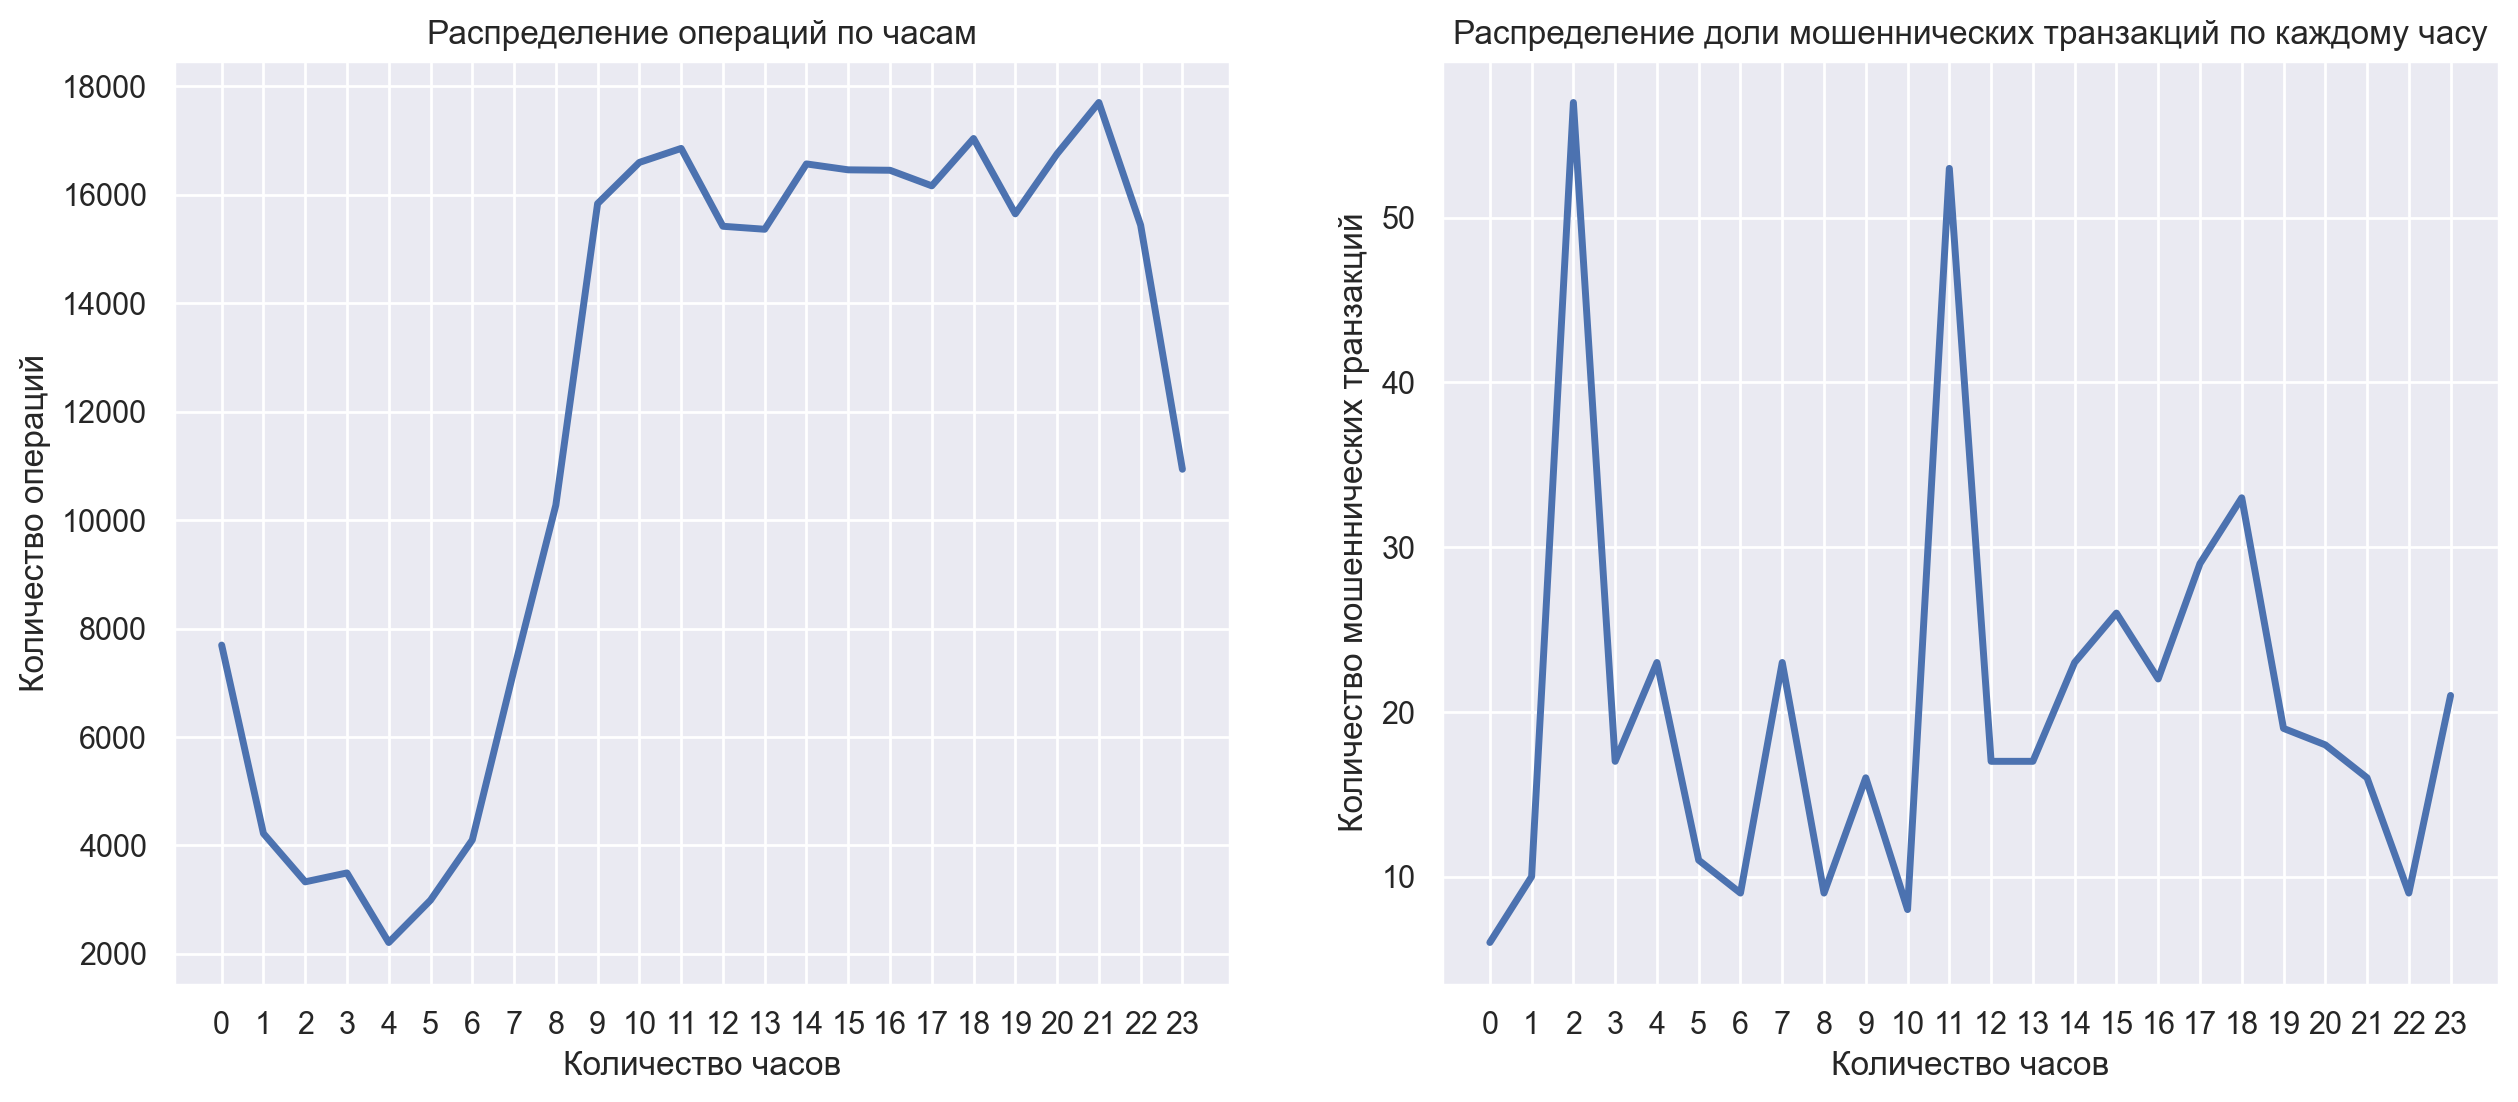

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax1 = ax[0]
sns.lineplot(x='hours', y='count', data=hourly_counts, linewidth=2.5, ax=ax1)
ax1.set_xticks(hourly_counts.hours)
ax1.set_xlabel('Количество часов')
ax1.set_ylabel('Количество операций')
ax1.set_title('Распределение операций по часам')

ax2 = ax[1]
sns.lineplot(x='hours', y='count', data=a_hourly_counts, linewidth=2.5, ax=ax2)
ax2.set_xticks(a_hourly_counts.hours)
ax2.set_xlabel('Количество часов')
ax2.set_ylabel('Количество мошеннических транзакций')
ax2.set_title('Распределение доли мошеннических транзакций по каждому часу')

plt.show()

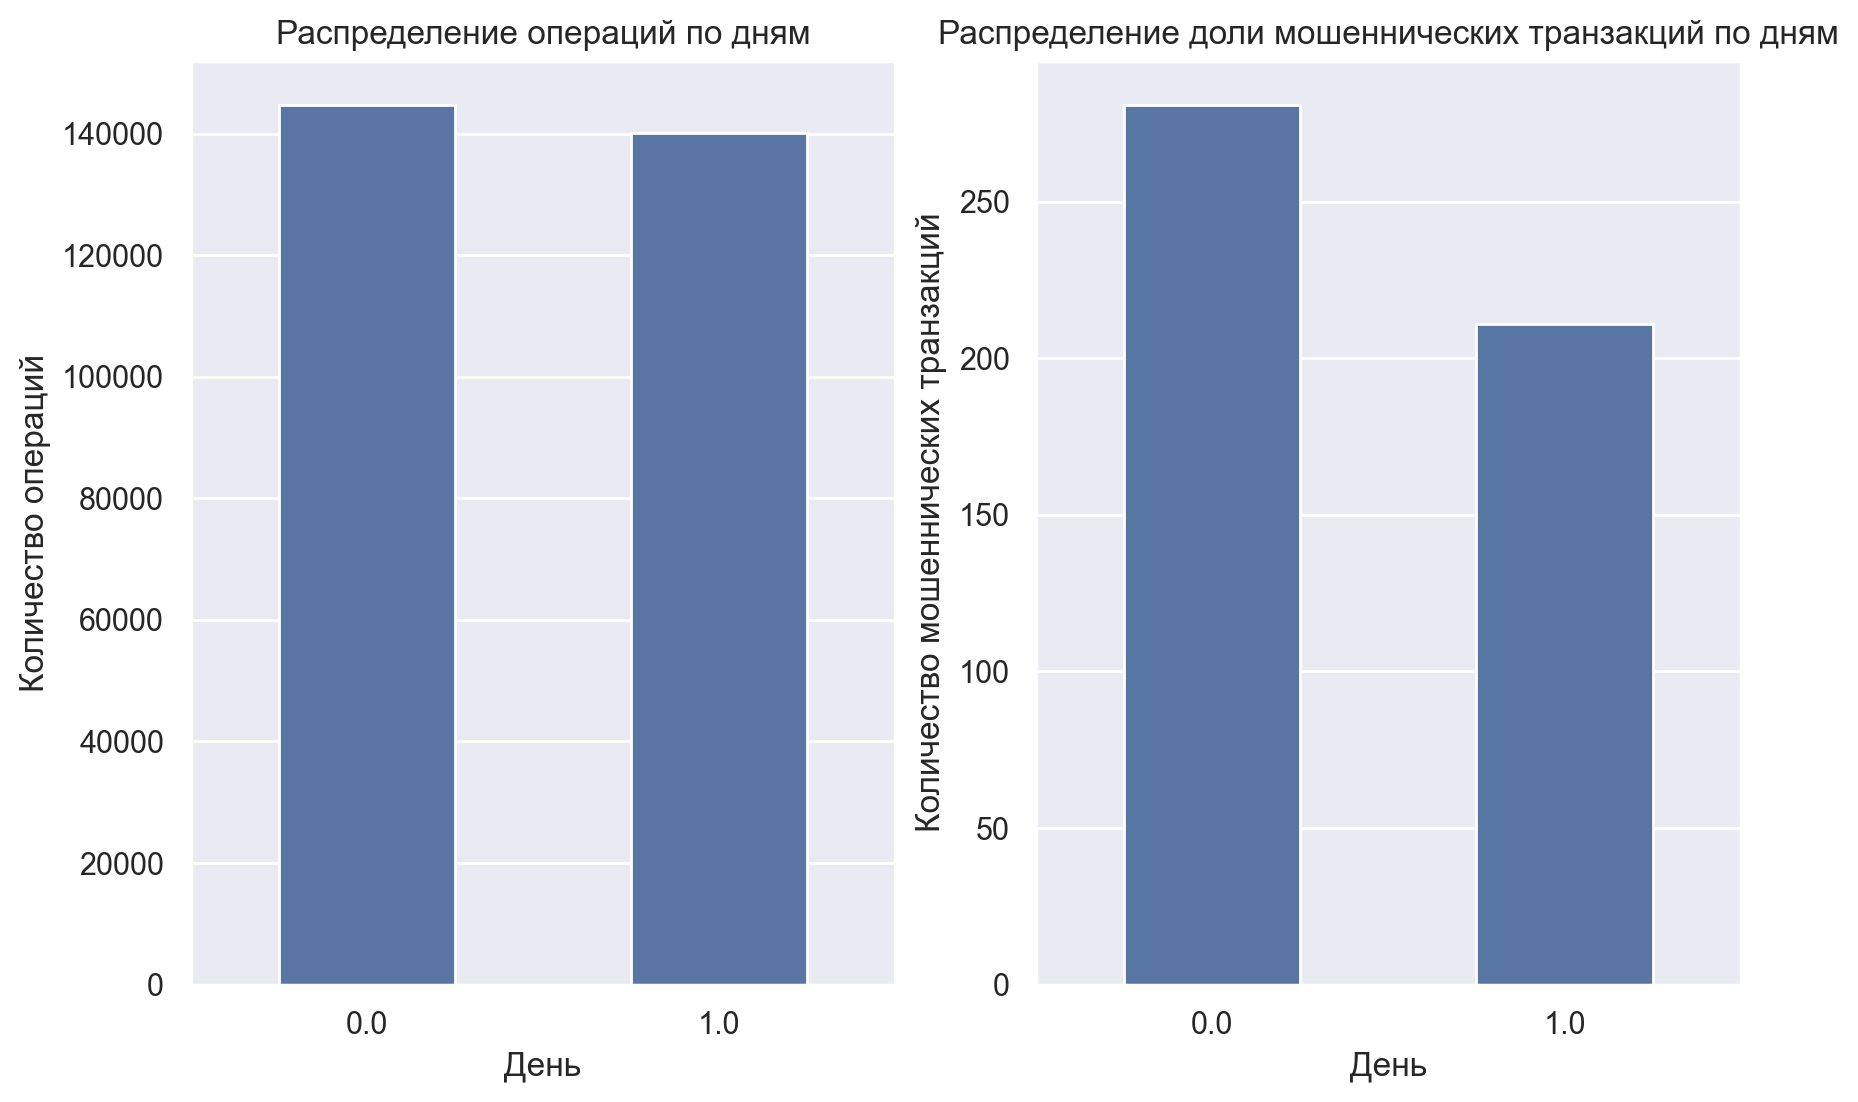

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

ax1 = ax[0]
sns.barplot(x='days', y='count', data=days_counts, width=0.5, ax=ax1)
ax1.set_xticks(days_counts.days)
ax1.set_xlabel('День')
ax1.set_ylabel('Количество операций')
ax1.set_title('Распределение операций по дням')

ax2 = ax[1]
sns.barplot(x='days', y='count', data=a_days_counts, width=0.5, ax=ax2)
ax2.set_xticks(a_days_counts.days)
ax2.set_xlabel('День')
ax2.set_ylabel('Количество мошеннических транзакций')
ax2.set_title('Распределение доли мошеннических транзакций по дням')

plt.show()

С анонимизированными признаками вряд ли можно придумать что-то интересное. Попробуйте (например, с помощью корреляции?) выбрать несколько наиболее важных признаков и поглядеть на различия в их распределении для разных классов.

In [11]:
corr_matrix = df.corr()

features_corr_min = corr_matrix.sort_values(by='Class')
features_corr_min = features_corr_min.iloc[0:3, :]
features_corr_min = features_corr_min.index.to_list()
features_corr_min

['V17', 'V14', 'V12']

In [12]:
features_corr_max = corr_matrix.sort_values(by='Class', ascending=False)
features_corr_max = features_corr_max.iloc[1:4, :]
features_corr_max = features_corr_max.index.tolist()
features_corr_max

['V11', 'V4', 'V2']

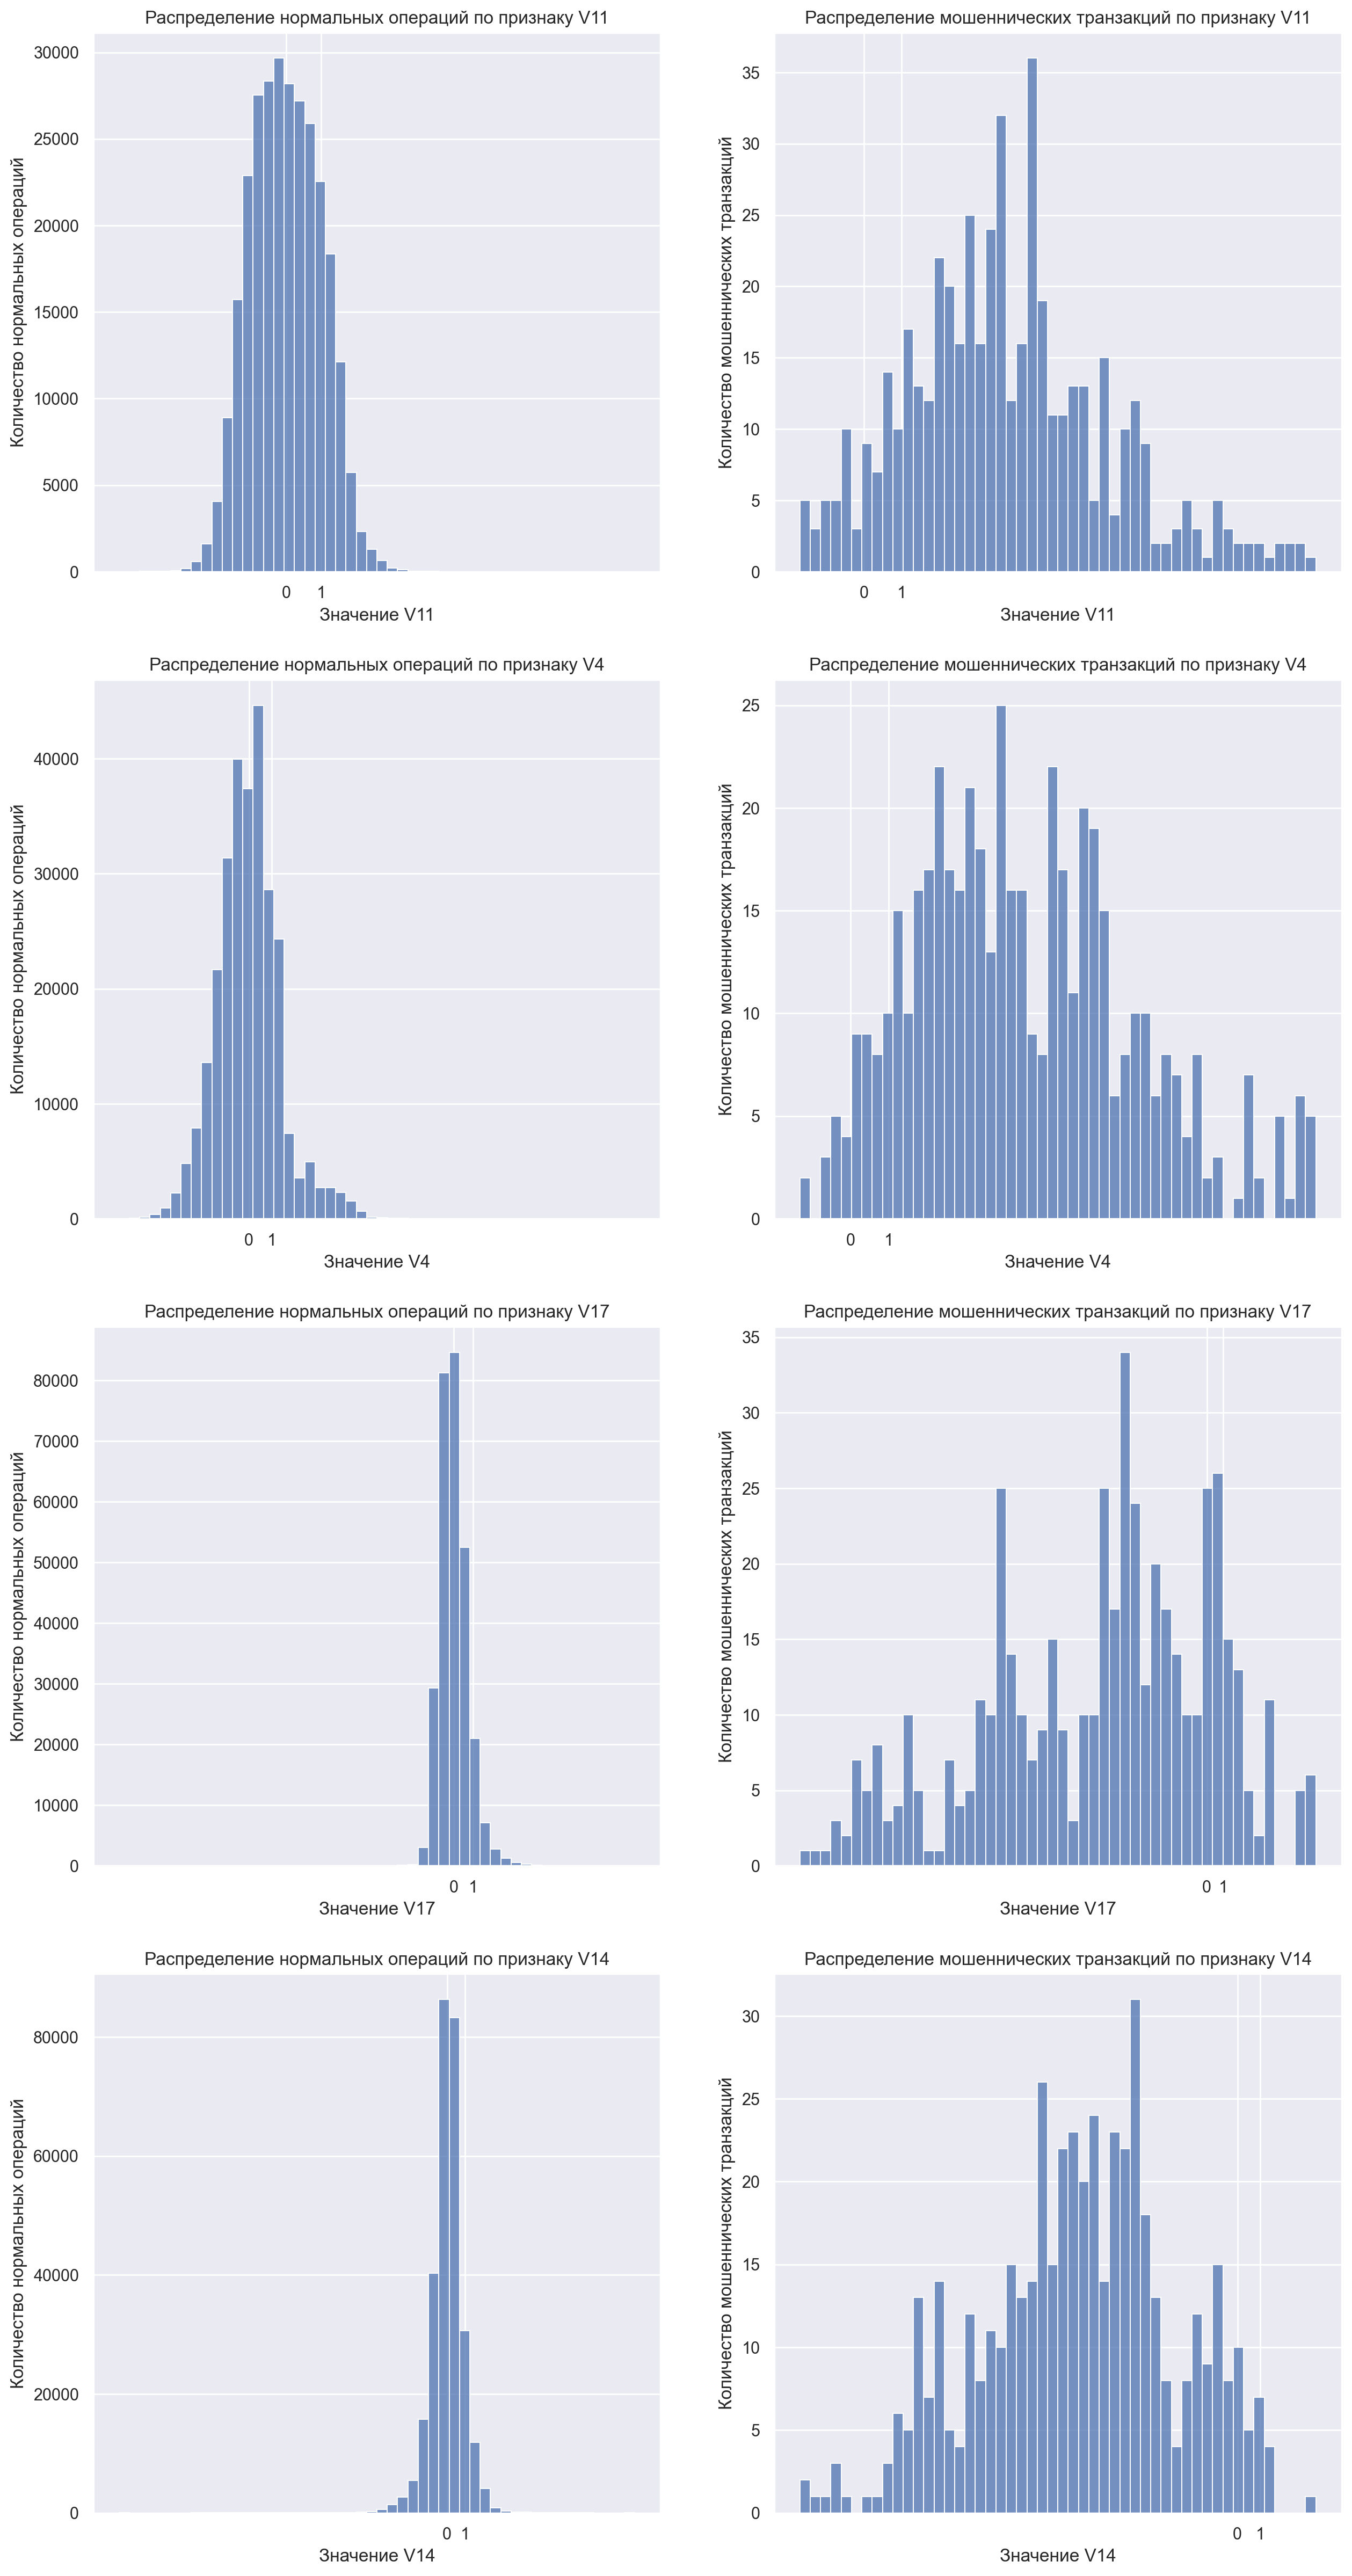

In [13]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 2, figsize=(15, 30))

sns.histplot(data=df_0, x='V11', bins=50, ax=ax1[0])
ax1[0].set_xticks(days_counts.days)
ax1[0].set_xlabel('Значение V11')
ax1[0].set_ylabel('Количество нормальных операций')
ax1[0].set_title('Распределение нормальных операций по признаку V11')

sns.histplot(data=df_1, x='V11', bins=50, ax=ax1[1])
ax1[1].set_xticks(a_days_counts.days)
ax1[1].set_xlabel('Значение V11')
ax1[1].set_ylabel('Количество мошеннических транзакций')
ax1[1].set_title('Распределение мошеннических транзакций по признаку V11')

# --------------------------------------------------------------------------------------------------

sns.histplot(data=df_0, x='V4', bins=50, ax=ax2[0])
ax2[0].set_xticks(days_counts.days)
ax2[0].set_xlabel('Значение V4')
ax2[0].set_ylabel('Количество нормальных операций')
ax2[0].set_title('Распределение нормальных операций по признаку V4')

sns.histplot(data=df_1, x='V4', bins=50, ax=ax2[1])
ax2[1].set_xticks(a_days_counts.days)
ax2[1].set_xlabel('Значение V4')
ax2[1].set_ylabel('Количество мошеннических транзакций')
ax2[1].set_title('Распределение мошеннических транзакций по признаку V4')

# --------------------------------------------------------------------------------------------------

sns.histplot(data=df_0, x='V17', bins=50, ax=ax3[0])
ax3[0].set_xticks(days_counts.days)
ax3[0].set_xlabel('Значение V17')
ax3[0].set_ylabel('Количество нормальных операций')
ax3[0].set_title('Распределение нормальных операций по признаку V17')

sns.histplot(data=df_1, x='V17', bins=50, ax=ax3[1])
ax3[1].set_xticks(a_days_counts.days)
ax3[1].set_xlabel('Значение V17')
ax3[1].set_ylabel('Количество мошеннических транзакций')
ax3[1].set_title('Распределение мошеннических транзакций по признаку V17')

# --------------------------------------------------------------------------------------------------

sns.histplot(data=df_0, x='V14', bins=50, ax=ax4[0])
ax4[0].set_xticks(days_counts.days)
ax4[0].set_xlabel('Значение V14')
ax4[0].set_ylabel('Количество нормальных операций')
ax4[0].set_title('Распределение нормальных операций по признаку V14')

sns.histplot(data=df_1, x='V14', bins=50, ax=ax4[1])
ax4[1].set_xticks(a_days_counts.days)
ax4[1].set_xlabel('Значение V14')
ax4[1].set_ylabel('Количество мошеннических транзакций')
ax4[1].set_title('Распределение мошеннических транзакций по признаку V14')

# --------------------------------------------------------------------------------------------------

plt.show()

Хорошо заметно, что значения признаков у нормального класса не отдодит налеко от интервала (0, 1), в то время как у аномалий -- да.

Теперь давайте разделим данные. Отделите хронологически последние 20% транзакций и поделите их пополам (также хронологически, т.е. без перемешивания) на валидационные и тестовые. Это разбиение не совсем корректно (как можно было заметить, мошеннические транзакции имеют разное распределение во времени - по-хорошему, нам стоило бы выделить целые сутки записей как под валидацию, так и под тест), тем не менее, мы не сможем получить больше данных для адекватного контроля, поэтому обойдемся этим. 

In [14]:
len_val_test = round(df.shape[0] * 0.2)
print(len_val_test)

df_train = df.iloc[:-len_val_test]      # первые 80% в обучающую выборку
df_val_test = df.iloc[-len_val_test:]       # последние 20% для валидации и теста

len_test = round(len_val_test / 2)
print(len_test)

df_val = df_val_test.iloc[:-len_test]
df_test = df_val_test.iloc[-len_test:]

56961
28480


In [15]:
X_train = df_train.drop('Class', axis=1)
y_train = df_train['Class']

X_val = df_val.drop('Class', axis=1)
y_val = df_val['Class']

X_test = df_test.drop('Class', axis=1)
y_test = df_test['Class']

# Часть 1. Несбалансированная классификация.

**Задание 0. (1 балл)**: перед началом работы давайте поговорим о том, как мы будем оценивать качество. Классические метрики для качества классификации чаще всего "ломаются" на задачах с сильным перекосом. Чему будет равно значение accuracy для наивного предсказания (= мажорный класс для каждого объекта)? (можете не отвечать, просто подумайте)

__Ответ:__ Значение accuracy будет равно доле мажорного класса в общем количестве объектов.

Из курса МО-1 вам уже известно, что мы можем использовать в таких задачах `AUC-PR` и получать адекватные показатели. Можно сказать, что `AUC-PR` представляет собой матожидание `precision` по распределению, заданному выигрышем в `recall` при смене порога. 

In [16]:
class NaiveClassifier:
    def __init__(self):
        pass

    def fit(self, X, y):
        pass

    def predict(self, X):
        return np.array([0] * len(X))
    
    def predict_proba(self, X):
        return [[1, 0]] * len(X)

In [17]:
from sklearn.metrics import accuracy_score

nc = NaiveClassifier()
nc.fit(X_train, y_train)

y_pred = nc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9992275280898877


In [18]:
df_test.Class.value_counts()[0]/df_test.Class.values.shape[0]

0.9992275280898877

_Ну, как бы ч.т.д._

In [19]:
from sklearn.metrics import precision_recall_curve, auc

y_pred_proba = nc.predict_proba(X_test)
y_pred_proba = np.array(y_pred_proba)
y_pred_proba = y_pred_proba[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

auc_pr = auc(recall, precision)
print("AUC-PR:", auc_pr)

AUC-PR: 0.5003862359550562


Тем не менее, существуют и другие, не менее интересные метрики. Одной из таких метрик является коэффициент Каппа Коэна, представляющий собой нормализованную `accuracy`:

$$\kappa = \frac{p_o - p_e}{1 - p_e}$$

Данная метрика служит в качестве меры согласованности между двумя независимыми предсказателями, но ничего не знает про "верные" и "предсказанные" метки (в отличие от многих других метрик машинного обучения). Здесь $p_o$ - доля согласованных предсказаний, а $p_e$ - доля согласованных предсказаний, которая могла бы получиться при случайных ответах предсказателей. В нашем случае это работает так:

• В качестве $p_o$ берем accuracy

• В качестве $p_e$ примем следующую величину - вероятность случайного соглашения позитивных ответов (произведение долей позитивных ответов в обоих предсказаниях) плюс вероятность случайного соглашения негативных ответов (произведение долей негативных ответов в обоих предсказаниях)

Метрика принимает значения от -1 до 1, где 1 - полная согласованность, 0 - согласованность на уровне рандома, -1 - совсем плохо. Как уже говорилось, метрика не различает "верные" и "предсказанные" метки, поэтому является симметричной (можете использовать это для отладки):

In [20]:
def cohen_kappa_score(y_true, y_pred):

    p_0 = accuracy_score(y_true, y_pred)

    p_neg_0 = y_true.mean()     # нашли долю негативного (ненулевого) класса в 1-ом предсказании
    p_neg_1 = y_pred.mean()     # доля во 2-ом предсказании
    p_neg = p_neg_0 * p_neg_1       # произведение долей негативных ответов в обоих предсказания

    # аналогично для позитивных ответов
    p_pos_0 = 1 - p_neg_0
    p_pos_1 = 1 - p_neg_1
    p_pos = p_pos_0 * p_pos_1

    p_e = p_neg + p_pos

    return (p_0 - p_e) / (1 - p_e)

Еще одной метрикой в такой задаче служит коэффициент корреляции Мэтьюза, выражающийся в терминах матрицы ошибок следующим образом:

$$\text{MCC} = \frac{TP\times TN - FP \times FN}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}}$$ 

Метрика принимает значения от -1 до 1, интерпретируемые аналогичным образом. 

_Здесь мне стало уже немножко лень, а реализация в склёрне есть, так что..._

In [21]:
from sklearn.metrics import matthews_corrcoef

Обратите внимание, что эти метрики вычисляются на бинаризованных предсказаниях, поэтому может иметь смысл дополнительная настройка порога бинаризации.

Давайте проверим, что наши метрики действительно подходят под задачу. Вычислите их значения для наивного предсказания (aka мажорный класс для всех объектов):

In [22]:
cohen_kappa_score(y_test, y_pred)

0.0

In [23]:
matthews_corrcoef(y_test, y_pred)

0.0

_И в первом, и во втором рандом, как мы можем видеть._

Давайте запустим бейзлайн-решение для нашей задачи. С чего же начнем? Возьмите `catboost` и обучите его классификатор на наших данных (используйте все признаки). Вычислите значения всех метрик на тестовой части, для контроля переобучения используйте валидационную (здесь и далее везде, где фигурирует `catboost`). 

In [26]:
from catboost import CatBoostClassifier, Pool

train_pool = Pool(data=X_train, label=y_train)
val_pool = Pool(data=X_val, label=y_val)

catboost = CatBoostClassifier(random_seed=42)
catboost.fit(train_pool, eval_set=val_pool, verbose=False)

y_pred = catboost.predict(X_test)

k = cohen_kappa_score(y_test, y_pred)
m_coef = matthews_corrcoef(y_test, y_pred)

print('Catboost cohen kappa coef: ', k)
print('Catboost matthews corrcoef: ', m_coef)

Catboost cohen kappa coef:  0.7498260729018189
Catboost matthews corrcoef:  0.7536088558732887


Если вы все сделали правильно, у вас должны были получиться значения в районе 0.7.

**Задание 1. (1 балл)**. Многие реализации методов предлагают встроенные способы для борьбы с нашей проблемой. Самое часто встречающееся решение - просто добавить вес в функции потерь для минорного класса (таким образом, ошибка на объекте минорного класса будет весить больше, чем для мажорного). В `catboost` это также реализовано, причем для бинарной задачи это можно сделать целыми двумя способами (можете выбрать любой, на свой вкус, автор задания предпочитает отдельный скейлинг для минорного класса). Чаще всего в качестве веса берется отношение числа объектов мажорного класса к числу минорного. Попробуйте обучить модель с таким скалированием и сравните метрики на тестовой части с бейзлайном.

In [32]:
classes = np.unique(y_train)        # достали возможные метки классов (0 и 1)
weight_1 = df_train.Class.value_counts()[0]/df_train.Class.value_counts()[1]
# weight_1 = 1500 -- что-то вроде экстремального скалирования
weight_0 = 1
weights = np.array([weight_0, weight_1])
class_weights = dict(zip(classes, weights))

catboost_0 = CatBoostClassifier(class_weights=class_weights, random_seed=42)
catboost_0.fit(train_pool, eval_set=val_pool, verbose=False)


y_pred = catboost_0.predict(X_test)

k = cohen_kappa_score(y_test, y_pred)
m_coef = matthews_corrcoef(y_test, y_pred)

print('Catboost cohen kappa coef: ', k)
print('Catboost matthews corrcoef: ', m_coef)

Catboost cohen kappa coef:  0.11061976496692634
Catboost matthews corrcoef:  0.2083174970583439


Поскольку данный вес будет являться гиперпараметром метода, было бы опрометчиво остановиться на одном значении (тем более, с большой вероятностью у вас все сломалось). Запустите перебор для этого гиперпараметра на валидационной выборке (используйте `PR-AUC`), подберите оптимальный порог бинаризации для $\kappa$ или $\text{MCC}$. Для лучшего найденного веса и порога вычислите все метрики на тестовой части. 

При этом можете также проверить отдельное скалирование в большую сторону для мажорного класса (т.е. веса минорного сделать меньше 1) и экстремальные скалирования (т.е. веса минорного больше, чем в начале этого задания). Какой вес получился оптимальным?

_Экстремальное скалирование я попробовала выше просто методом тыка, качество получилось ужасным._
_Поэтому ниже для начала попробуем просто подобрать вес для минорного класса и улучшить качество модели._

In [33]:
def train_catboost_model_minor(weight_1, train_pool, val_pool):
    weight_0 = 1
    weights = np.array([weight_0, weight_1])
    class_weights = dict(zip(classes, weights))
    catboost_model = CatBoostClassifier(class_weights=class_weights, random_seed=42)
    catboost_model.fit(train_pool, eval_set=val_pool, verbose=False)
    
    y_val_proba = catboost_model.predict_proba(val_pool)[:, 1]
    precision, recall, _ = precision_recall_curve(y_val, y_val_proba)
    auc_pr = auc(recall, precision)
    
    return auc_pr

In [34]:
weight_1_range = np.linspace(0.1, 10, 5)

auc_pr_scores = []      # список для сохранения значений PR-AUC

for weight_1 in weight_1_range:
    auc_pr = train_catboost_model_minor(weight_1, train_pool, val_pool)
    auc_pr_scores.append(auc_pr)

best_weight_1 = weight_1_range[np.argmax(auc_pr_scores)]        # нахождение наилучшего значения weight_1
best_pr_auc = max(auc_pr_scores)

print("Наилучшее значение weight_1:", best_weight_1)
print("Наилучшее значение PR-AUC:", best_pr_auc)

Наилучшее значение weight_1: 2.575
Наилучшее значение PR-AUC: 0.8566623105841005


In [35]:
classes = np.unique(y_train)

weight_0 = 1
weight_1 = best_weight_1

weights = np.array([weight_0, weight_1])
class_weights = dict(zip(classes, weights))

catboost_1 = CatBoostClassifier(class_weights=class_weights, random_seed=42)
catboost_1.fit(train_pool, eval_set=val_pool, verbose=False)

y_pred_proba = catboost_1.predict(X_test)

k = cohen_kappa_score(y_test, y_pred)
m_coef = matthews_corrcoef(y_test, y_pred)

print('Catboost cohen kappa coef: ', k)
print('Catboost matthews corrcoef: ', m_coef)

Catboost cohen kappa coef:  0.11061976496692634
Catboost matthews corrcoef:  0.2083174970583439


_Теперь попробуем отдельное скалирование в большую сторону для мажорного класса._

In [36]:
def train_catboost_model_major(weight_0, train_pool, val_pool):
    weight_1 = 1
    weights = np.array([weight_0, weight_1])
    class_weights = dict(zip(classes, weights))
    catboost_model = CatBoostClassifier(class_weights=class_weights, random_seed=42)
    catboost_model.fit(train_pool, eval_set=val_pool, verbose=False)
    
    y_val_proba = catboost_model.predict_proba(val_pool)[:, 1]
    precision, recall, _ = precision_recall_curve(y_val, y_val_proba)
    auc_pr = auc(recall, precision)
    
    return auc_pr

In [37]:
weight_0_range = np.linspace(0.001, 1.2, 5)

auc_pr_scores = []

for weight_0 in weight_0_range:
    auc_pr = train_catboost_model_major(weight_0, train_pool, val_pool)
    auc_pr_scores.append(auc_pr)

best_weight_0 = weight_0_range[np.argmax(auc_pr_scores)]
best_pr_auc = max(auc_pr_scores)

print("Наилучшее значение weight_0:", best_weight_0)
print("Наилучшее значение PR-AUC:", best_pr_auc)

Наилучшее значение weight_0: 0.6005
Наилучшее значение PR-AUC: 0.8716267921113149


In [38]:
classes = np.unique(y_train)

weight_0 = best_weight_0
weight_1 = 1

weights = np.array([weight_0, weight_1])
class_weights = dict(zip(classes, weights))

catboost_1_1 = CatBoostClassifier(class_weights=class_weights, random_seed=42)
catboost_1_1.fit(train_pool, eval_set=val_pool, verbose=False)

y_pred_proba = catboost_1_1.predict(X_test)

k = cohen_kappa_score(y_test, y_pred)
m_coef = matthews_corrcoef(y_test, y_pred)

print('Catboost cohen kappa coef: ', k)
print('Catboost matthews corrcoef: ', m_coef)

Catboost cohen kappa coef:  0.11061976496692634
Catboost matthews corrcoef:  0.2083174970583439


_Попробуем подобрать оптимальный вес для обоих классов вместе._

In [39]:
def train_catboost_model(weight_0, weight_1, train_pool, val_pool):
    weights = np.array([weight_0, weight_1])
    class_weights = dict(zip(classes, weights))
    catboost_model = CatBoostClassifier(class_weights=class_weights, random_seed=42)
    catboost_model.fit(train_pool, eval_set=val_pool, verbose=False)
    
    y_val_proba = catboost_model.predict_proba(val_pool)[:, 1]
    precision, recall, _ = precision_recall_curve(y_val, y_val_proba)
    auc_pr = auc(recall, precision)
    
    return auc_pr

In [40]:
import optuna

def objective(trial):
    weight_0 = trial.suggest_float('weight_0', 0.01, 100)
    weight_1 = trial.suggest_float('weight_1', 0.01, 100)

    auc_pr = train_catboost_model(weight_0, weight_1, train_pool, val_pool)

    return 1. / auc_pr

study = optuna.create_study()
study.optimize(objective, n_trials=100, n_jobs=-1)

[I 2024-05-19 19:43:00,947] A new study created in memory with name: no-name-ef78784a-da80-4b79-8992-14d0e7227deb
[I 2024-05-19 19:47:26,732] Trial 2 finished with value: 1.1704207609735908 and parameters: {'weight_0': 0.9486259317989973, 'weight_1': 18.212617889829577}. Best is trial 2 with value: 1.1704207609735908.
[I 2024-05-19 19:47:31,817] Trial 6 finished with value: 1.1479002794946562 and parameters: {'weight_0': 21.102311555010797, 'weight_1': 88.91971666214839}. Best is trial 6 with value: 1.1479002794946562.
[I 2024-05-19 19:47:52,794] Trial 3 finished with value: 1.1644783374561611 and parameters: {'weight_0': 65.72721018801761, 'weight_1': 85.0034929674195}. Best is trial 6 with value: 1.1479002794946562.
[I 2024-05-19 19:47:55,817] Trial 1 finished with value: 1.163423734634298 and parameters: {'weight_0': 14.277922042763489, 'weight_1': 64.93267545697151}. Best is trial 6 with value: 1.1479002794946562.
[I 2024-05-19 19:47:56,168] Trial 4 finished with value: 1.150171498

In [41]:
best_weight = study.best_params

# {'weight_0': 23.453694088039708, 'weight_1': 99.35589263420931}

In [42]:
print(best_weight)

{'weight_0': 4.5737926772151205, 'weight_1': 99.93757185889805}


_Обучим модель с новыми параметрами._

In [43]:
classes = np.unique(y_train)

weight_0 = best_weight['weight_0']
weight_1 = best_weight['weight_1']

weights = np.array([weight_0, weight_1])
class_weights = dict(zip(classes, weights))

catboost_2 = CatBoostClassifier(class_weights=class_weights, random_seed=42)
catboost_2.fit(train_pool, eval_set=val_pool, verbose=False)

_Подберём порог для бинаризации предсказаний._

In [44]:
def find_optimal_threshold(y_true, y_pred_proba, metric):
    thresholds = np.linspace(0, 1, 200)
    best_threshold = None
    best_score = -np.inf
    
    for threshold in thresholds:
        y_pred = (y_pred_proba[:, 0] < threshold).astype(int)
        score = metric(y_true, y_pred)
        
        if score > best_score:
            best_score = score
            best_threshold = threshold
    
    return best_threshold

In [45]:
y_pred_proba_val = catboost_2.predict_proba(X_val)

best_threshold = find_optimal_threshold(y_val, y_pred_proba_val, matthews_corrcoef)
print(best_threshold)

0.23618090452261306


In [46]:
find_optimal_threshold(y_val, y_pred_proba_val, cohen_kappa_score)

0.23618090452261306

In [47]:
y_pred_proba = catboost_2.predict_proba(X_test)
y_pred = (y_pred_proba[:, 0] < best_threshold).astype(int)

k = cohen_kappa_score(y_test, y_pred)
m_coef = matthews_corrcoef(y_test, y_pred)

print('Catboost cohen kappa coef: ', k)
print('Catboost matthews corrcoef: ', m_coef)

Catboost cohen kappa coef:  0.7108828132076715
Catboost matthews corrcoef:  0.711058682604368


_Ну, качество стало 0.76, повыше чем было, но не то чтобы прям супер._

**Задание 2. (1 балл)**. На самом деле, то, что мы сейчас делали, очень схоже с другой распространенной техникой - оверсэмплингом. Фактически, мы можем продублировать все объекты минорного класса и получить тот же эффект, какой был бы при использовании веса, равного 2. Тем не менее, такой подход - это лишь малая часть того, что мы можем проделать с целью повысить число объектов минорного класса. 

Для продолжения работы установим библиотеку [imbalanced-learn](https://imbalanced-learn.org/stable/):

In [41]:
# !pip3 install imbalanced-learn

Первый метод, которым мы воспользуемся, называется SMOTE (его вы уже разбирали на лекции). Кратко напомним суть: мы выбираем случайного кандидата среди $k$ ближайших соседей объекта минорного класса, затем берем точку на отрезке между двумя объектами (т.е. выпуклую комбинацию со случайными коэффициентами) и добавляем в выборку. 

In [48]:
from imblearn.over_sampling import SMOTE

Используйте SMOTE для ресэмплинга обучающей выборки, на новой выборке обучите модель (вес положительных объектов скалировать не нужно). Замерьте качество на тестовой выборке (**важно!** не преобразовывайте валидационную и тестовую выборку никак - мы не хотим отслеживать качество на объектах, которых в реальности не существует). Сравните полное выравнивание выборки с частичным (т.е. таким, что баланс классов улучшается, но не достигает равенства - скажем, 1:2 и 1:10).

In [49]:
smote = SMOTE(
    # определяет соотношение числа объектов в минорном классе после ресэмплинга к числу объектов в мажорном классе
    sampling_strategy='auto',  # 'auto': увеличение меньшего класса до размера большинственного
    random_state=42,
    k_neighbors=5,
    n_jobs=-1       # -1: используем все доступные ядра для параллельной работы
)


X_train_resampled, y_train_resamples = smote.fit_resample(X_train, y_train)

c:\Users\Настя\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\over_sampling\_smote\base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [50]:
len(y_train_resamples[y_train_resamples == 1])/len(y_train_resamples[y_train_resamples == 0])

1.0

In [51]:
resampled_train_pool = Pool(data=X_train_resampled, label=y_train_resamples)

catboost_smote = CatBoostClassifier(random_seed=42)
catboost_smote.fit(resampled_train_pool, eval_set=val_pool, verbose=False)

y_pred = catboost_smote.predict(X_test)

k = cohen_kappa_score(y_test, y_pred)
m_coef = matthews_corrcoef(y_test, y_pred)

print('Catboost cohen kappa coef: ', k)
print('Catboost matthews corrcoef: ', m_coef)

Catboost cohen kappa coef:  0.7108828132076715
Catboost matthews corrcoef:  0.711058682604368


In [52]:
smote_1_2 = SMOTE(
    sampling_strategy=0.5,
    random_state=42,
    k_neighbors=5,
    n_jobs=-1
)

X_train_resampled, y_train_resamples = smote_1_2.fit_resample(X_train, y_train)

# подготовка данных для катбуста
resampled_train_pool = Pool(data=X_train_resampled, label=y_train_resamples)

# обучаем модель
catboost_smote_1 = CatBoostClassifier(random_seed=42)
catboost_smote_1.fit(resampled_train_pool, eval_set=val_pool, verbose=False)

y_pred = catboost_smote_1.predict(X_test)

k = cohen_kappa_score(y_test, y_pred)
m_coef = matthews_corrcoef(y_test, y_pred)

print('Catboost cohen kappa coef: ', k)
print('Catboost matthews corrcoef: ', m_coef)

c:\Users\Настя\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\over_sampling\_smote\base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Catboost cohen kappa coef:  0.6527656254034396
Catboost matthews corrcoef:  0.6561966869909432


In [53]:
smote_1_10 = SMOTE(
    sampling_strategy=0.1,
    random_state=42,
    k_neighbors=5,
    n_jobs=-1
)

X_train_resampled, y_train_resamples = smote_1_10.fit_resample(X_train, y_train)

resampled_train_pool = Pool(data=X_train_resampled, label=y_train_resamples)

catboost_smote_2 = CatBoostClassifier(random_seed=42)
catboost_smote_2.fit(resampled_train_pool, eval_set=val_pool, verbose=False)

y_pred = catboost_smote_2.predict(X_test)

k = cohen_kappa_score(y_test, y_pred)
m_coef = matthews_corrcoef(y_test, y_pred)

print('Catboost cohen kappa coef: ', k)
print('Catboost matthews corrcoef: ', m_coef)

c:\Users\Настя\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\over_sampling\_smote\base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Catboost cohen kappa coef:  0.6954066541178943
Catboost matthews corrcoef:  0.6960659355559996


_Попробую для последних двух моделек отскалировать минорный класс и посмотреть на качество (когда доделаю остальную работу)))_

**Бонус (1.5 балла)**. Для vanilla SMOTE существуют некоторые модификации, часть из которых была реализована в библиотеке imblearn. Во время лекций/семинаров эти модификации не рассматривались, тем не менее, мы все равно их исследуем.

Найдите статьи о следующих методах и попробуйте вкратце сформулировать, в чем их основная идея (сделайте так, чтобы человек, знакомый с машинным обучением в целом, но не слышавший конкретно про это смог понять):

BorderlineSMOTE - концентрируется на объектах из миноритарного класса, которые находятся на границе раздела классов (так как они с большей вероятостью могут быть неправильно классифицированы), и генерирует синтетические образцы только для этих "пограничных" объектов, и это по идее должно помочь лучше раделить объекты.

SVM-SMOTE - использует метод опорнвх веткоров для нахождения границы классов, и синтетические образцы как раз будут создаваться около разделяющей гиперплоскости, должно помочь, если классы линейно неразделимы.

K-Means-SMOTE - с помощь kmeans разбивает минорный класс на кластеры, а потом применяет smote к каждому кластеру отдельно, таким образом учитывается структура класса и генерируются более полезные синтетические данные.

ADASYN - взвешивает объекты миноритарного класса по их сложности и редкости, а затем регулирует количество синтетических образцов по этим весам, то есть для более редких и сложных для классификации образцов генерируется больше данных, это должно помочь лучше обучаться на сложных областях.

Теперь попробуйте сравнить качество всех методов на наших данных.

In [55]:
from imblearn.over_sampling import BorderlineSMOTE, SVMSMOTE, KMeansSMOTE, ADASYN

smote_variants = {
    'SMOTE': SMOTE(random_state=42, k_neighbors=5, n_jobs=-1),
    'BorderlineSMOTE': BorderlineSMOTE(random_state=42, k_neighbors=5, n_jobs=-1),
    'SVMSMOTE': SVMSMOTE(random_state=42, k_neighbors=5, n_jobs=-1),
    'KMeansSMOTE': KMeansSMOTE(random_state=42, cluster_balance_threshold=0.001, k_neighbors=10, n_jobs=-1),
    'ADASYN': ADASYN(random_state=42, n_jobs=-1)
}

def evaluate_model(X_train_res, y_train_res, X_test, y_test):
    res_train_pool = Pool(data=X_train_res, label=y_train_res)

    catboost = CatBoostClassifier(random_seed=42)
    catboost.fit(res_train_pool, eval_set=val_pool, verbose=False)

    y_pred = catboost.predict(X_test)

    return cohen_kappa_score(y_test, y_pred), matthews_corrcoef(y_test, y_pred)

In [56]:
results = {}

for name, smote in smote_variants.items():
    X_res, y_res = smote.fit_resample(X_train, y_train)
    k, m = evaluate_model(X_res, y_res, X_test, y_test)
    results[name] = {'cohen kappa coef': k, 'matthews corrcoef': m}

# выведем результаты
for name, metrics in results.items():
    print(f"Results for {name}:")
    print(f"cohen kappa coef: {metrics['cohen kappa coef']}")
    print(f"matthews corrcoef: {metrics['matthews corrcoef']}\n")

c:\Users\Настя\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\over_sampling\_smote\base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
c:\Users\Настя\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\over_sampling\_smote\filter.py:197: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
c:\Users\Настя\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\over_sampling\_smote\filter.py:437: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
C:\Users\Настя\AppData\Roaming\Python\Python39\site-packages\sklea

Results for SMOTE:
cohen kappa coef: 0.7108828132076715
matthews corrcoef: 0.711058682604368

Results for BorderlineSMOTE:
cohen kappa coef: 0.581430181705721
matthews corrcoef: 0.5934426475060716

Results for SVMSMOTE:
cohen kappa coef: 0.7439928872385557
matthews corrcoef: 0.7441944609774699

Results for KMeansSMOTE:
cohen kappa coef: 0.7998608583214551
matthews corrcoef: 0.8038960608087421

Results for ADASYN:
cohen kappa coef: 0.7108828132076715
matthews corrcoef: 0.711058682604368



**Задание 3. (1 балл)**. До этого момента все наши решения концентрировались на работе с минорным классом. Теперь давайте попробуем зайти с другой стороны. Может быть, для восстановления закономерностей нам не нужно столько объектов мажорного класса, и они просто засоряют нам выборку лишней информацией?

Для решения этой проблемы существуют методы андерсэмплинга. Самое простое, что можно придумать - удалять точки мажорного класса, пока мы не получим приемлемый баланс. Протестируйте следующий метод и постройте графики достигаемых значений метрик от баланса классов и от отношения размеров исходной и пересэмпленной выборки:

In [57]:
from imblearn.under_sampling import RandomUnderSampler

In [58]:
sampling_strategy_list = np.linspace(0.1, 1.0, 10)      # переберём разные соотношения миноритарного к мажоритарному классу послу ресэмплинга
results = []

for strategy in sampling_strategy_list:
    rus = RandomUnderSampler(sampling_strategy=strategy, random_state=42)
    X_res, y_res = rus.fit_resample(X_train, y_train)
    k, m = evaluate_model(X_res, y_res, X_test, y_test)

    original_size = len(y_train)
    resampled_size = len(y_res)
    balance = sum(y_res == 1) / len(y_res)      # отношение размера исходной выборки и пересэмплированной

    results.append((strategy, k, m, balance))

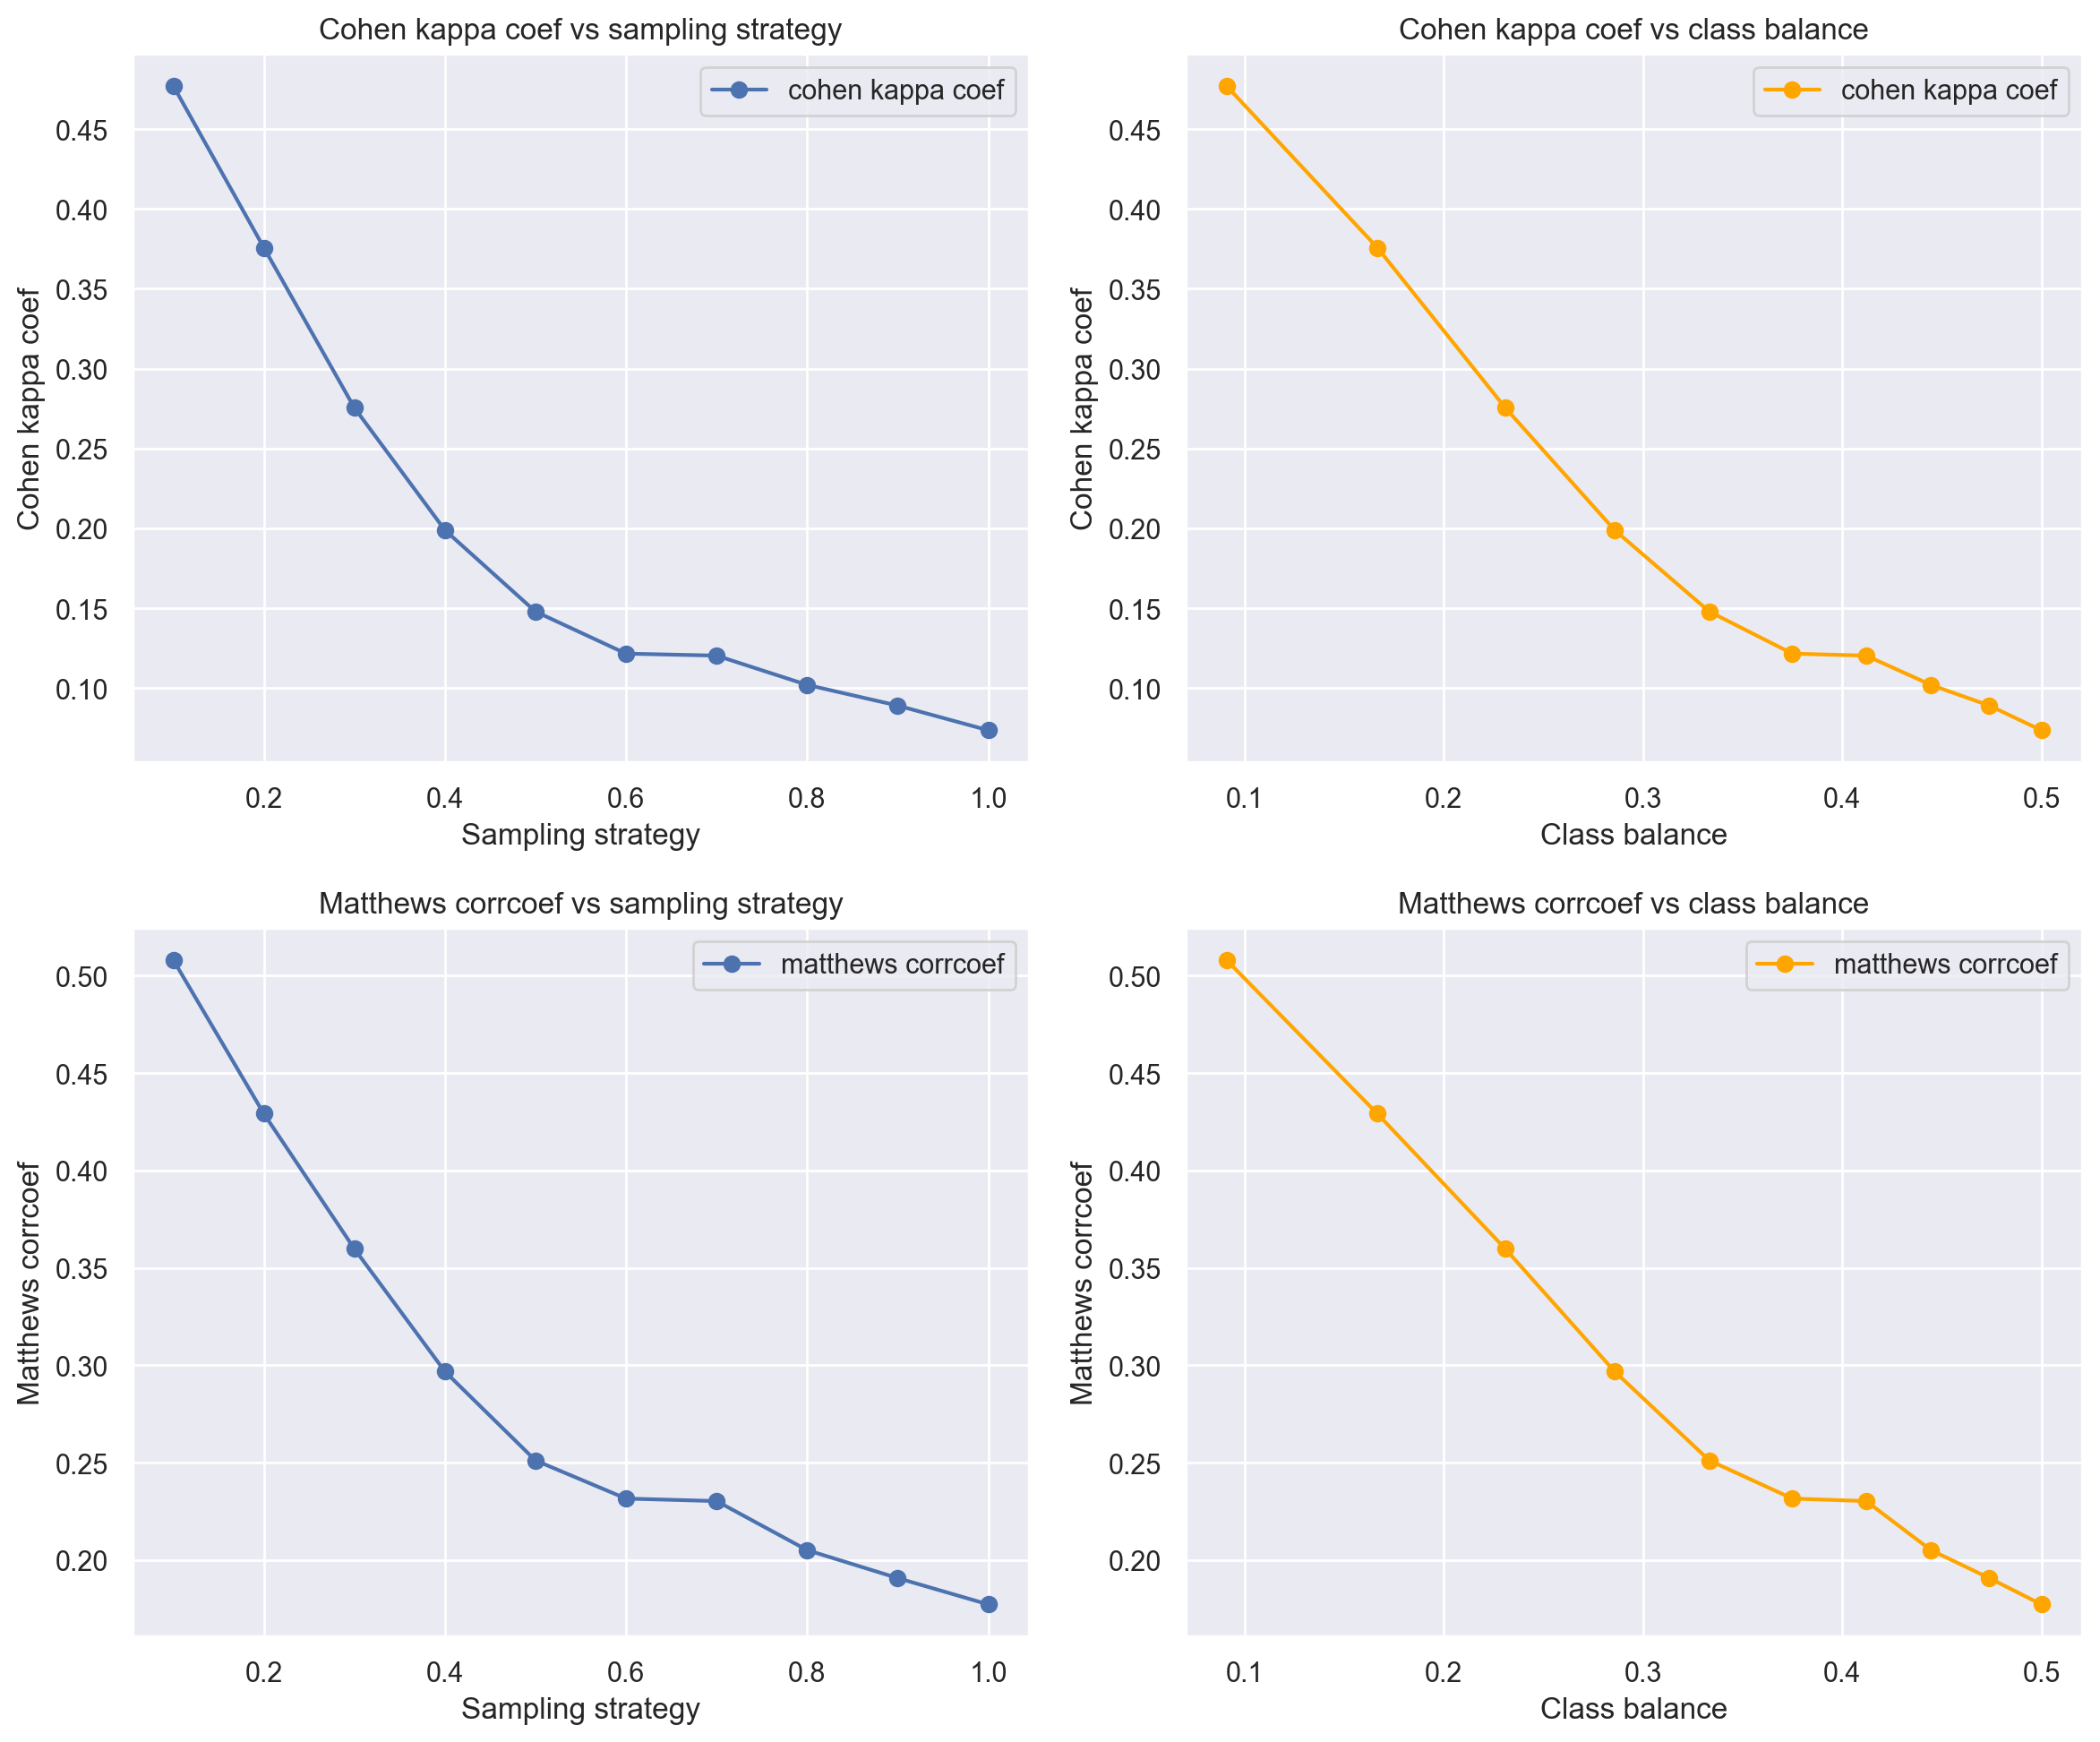

In [59]:
results_df = pd.DataFrame(results, columns=['sampling strategy', 'k', 'm', 'class balance'])

fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(12, 10))

ax1[0].plot(results_df['sampling strategy'], results_df['k'], marker='o', label='cohen kappa coef')
ax1[0].set_title('Cohen kappa coef vs sampling strategy')
ax1[0].set_xlabel('Sampling strategy')
ax1[0].set_ylabel('Cohen kappa coef')
ax1[0].legend()

ax1[1].plot(results_df['class balance'], results_df['k'], marker='o', label='cohen kappa coef', color='orange')
ax1[1].set_title('Cohen kappa coef vs class balance')
ax1[1].set_xlabel('Class balance')
ax1[1].set_ylabel('Cohen kappa coef')
ax1[1].legend()


# --------------------------------------------------------------------------------------------------


ax2[0].plot(results_df['sampling strategy'], results_df['m'], marker='o', label='matthews corrcoef')
ax2[0].set_title('Matthews corrcoef vs sampling strategy')
ax2[0].set_xlabel('Sampling strategy')
ax2[0].set_ylabel('Matthews corrcoef')
ax2[0].legend()

ax2[1].plot(results_df['class balance'], results_df['m'], marker='o', label='matthews corrcoef', color='orange')
ax2[1].set_title('Matthews corrcoef vs class balance')
ax2[1].set_xlabel('Class balance')
ax2[1].set_ylabel('Matthews corrcoef')
ax2[1].legend()



plt.tight_layout()
plt.show()

Даже такой наивный подход может дать относительно неплохие результаты и улучшить наши метрики. Тем не менее, сейчас мы никак не используем информацию о распределении объектов в выборке. Оказывается, что даже относительно простые эвристические правила могут заметно поднять нам качество - например, мы можем при отбрасывании использовать близость отдельных объектов мажорного класса к минорному и отбрасывать самые близкие. Протестируйте алгоритм [Near-Miss](https://www.site.uottawa.ca/~nat/Workshop2003/jzhang.pdf) на наших данных и постройте графики, аналогичные предыдущему пункту (также добавьте график с зависимостью качества от числа соседей).

In [65]:
from imblearn.under_sampling import NearMiss

n_neighbors_list = [1, 3, 5, 7, 10]
results_1 = []

for n_neighbors in n_neighbors_list:
    nm = NearMiss(version=1, n_neighbors=n_neighbors, sampling_strategy='auto')
    X_res, y_res = nm.fit_resample(X_train, y_train)
    k, m = evaluate_model(X_res, y_res, X_test, y_test)
    original_size = len(y_train)
    resampled_size = len(y_res)
    balance = sum(y_res == 1) / len(y_res)
    results_1.append((n_neighbors, k, m, balance))

results_df_1 = pd.DataFrame(results_1, columns=['n neighbors', 'k', 'm', 'class balance'])

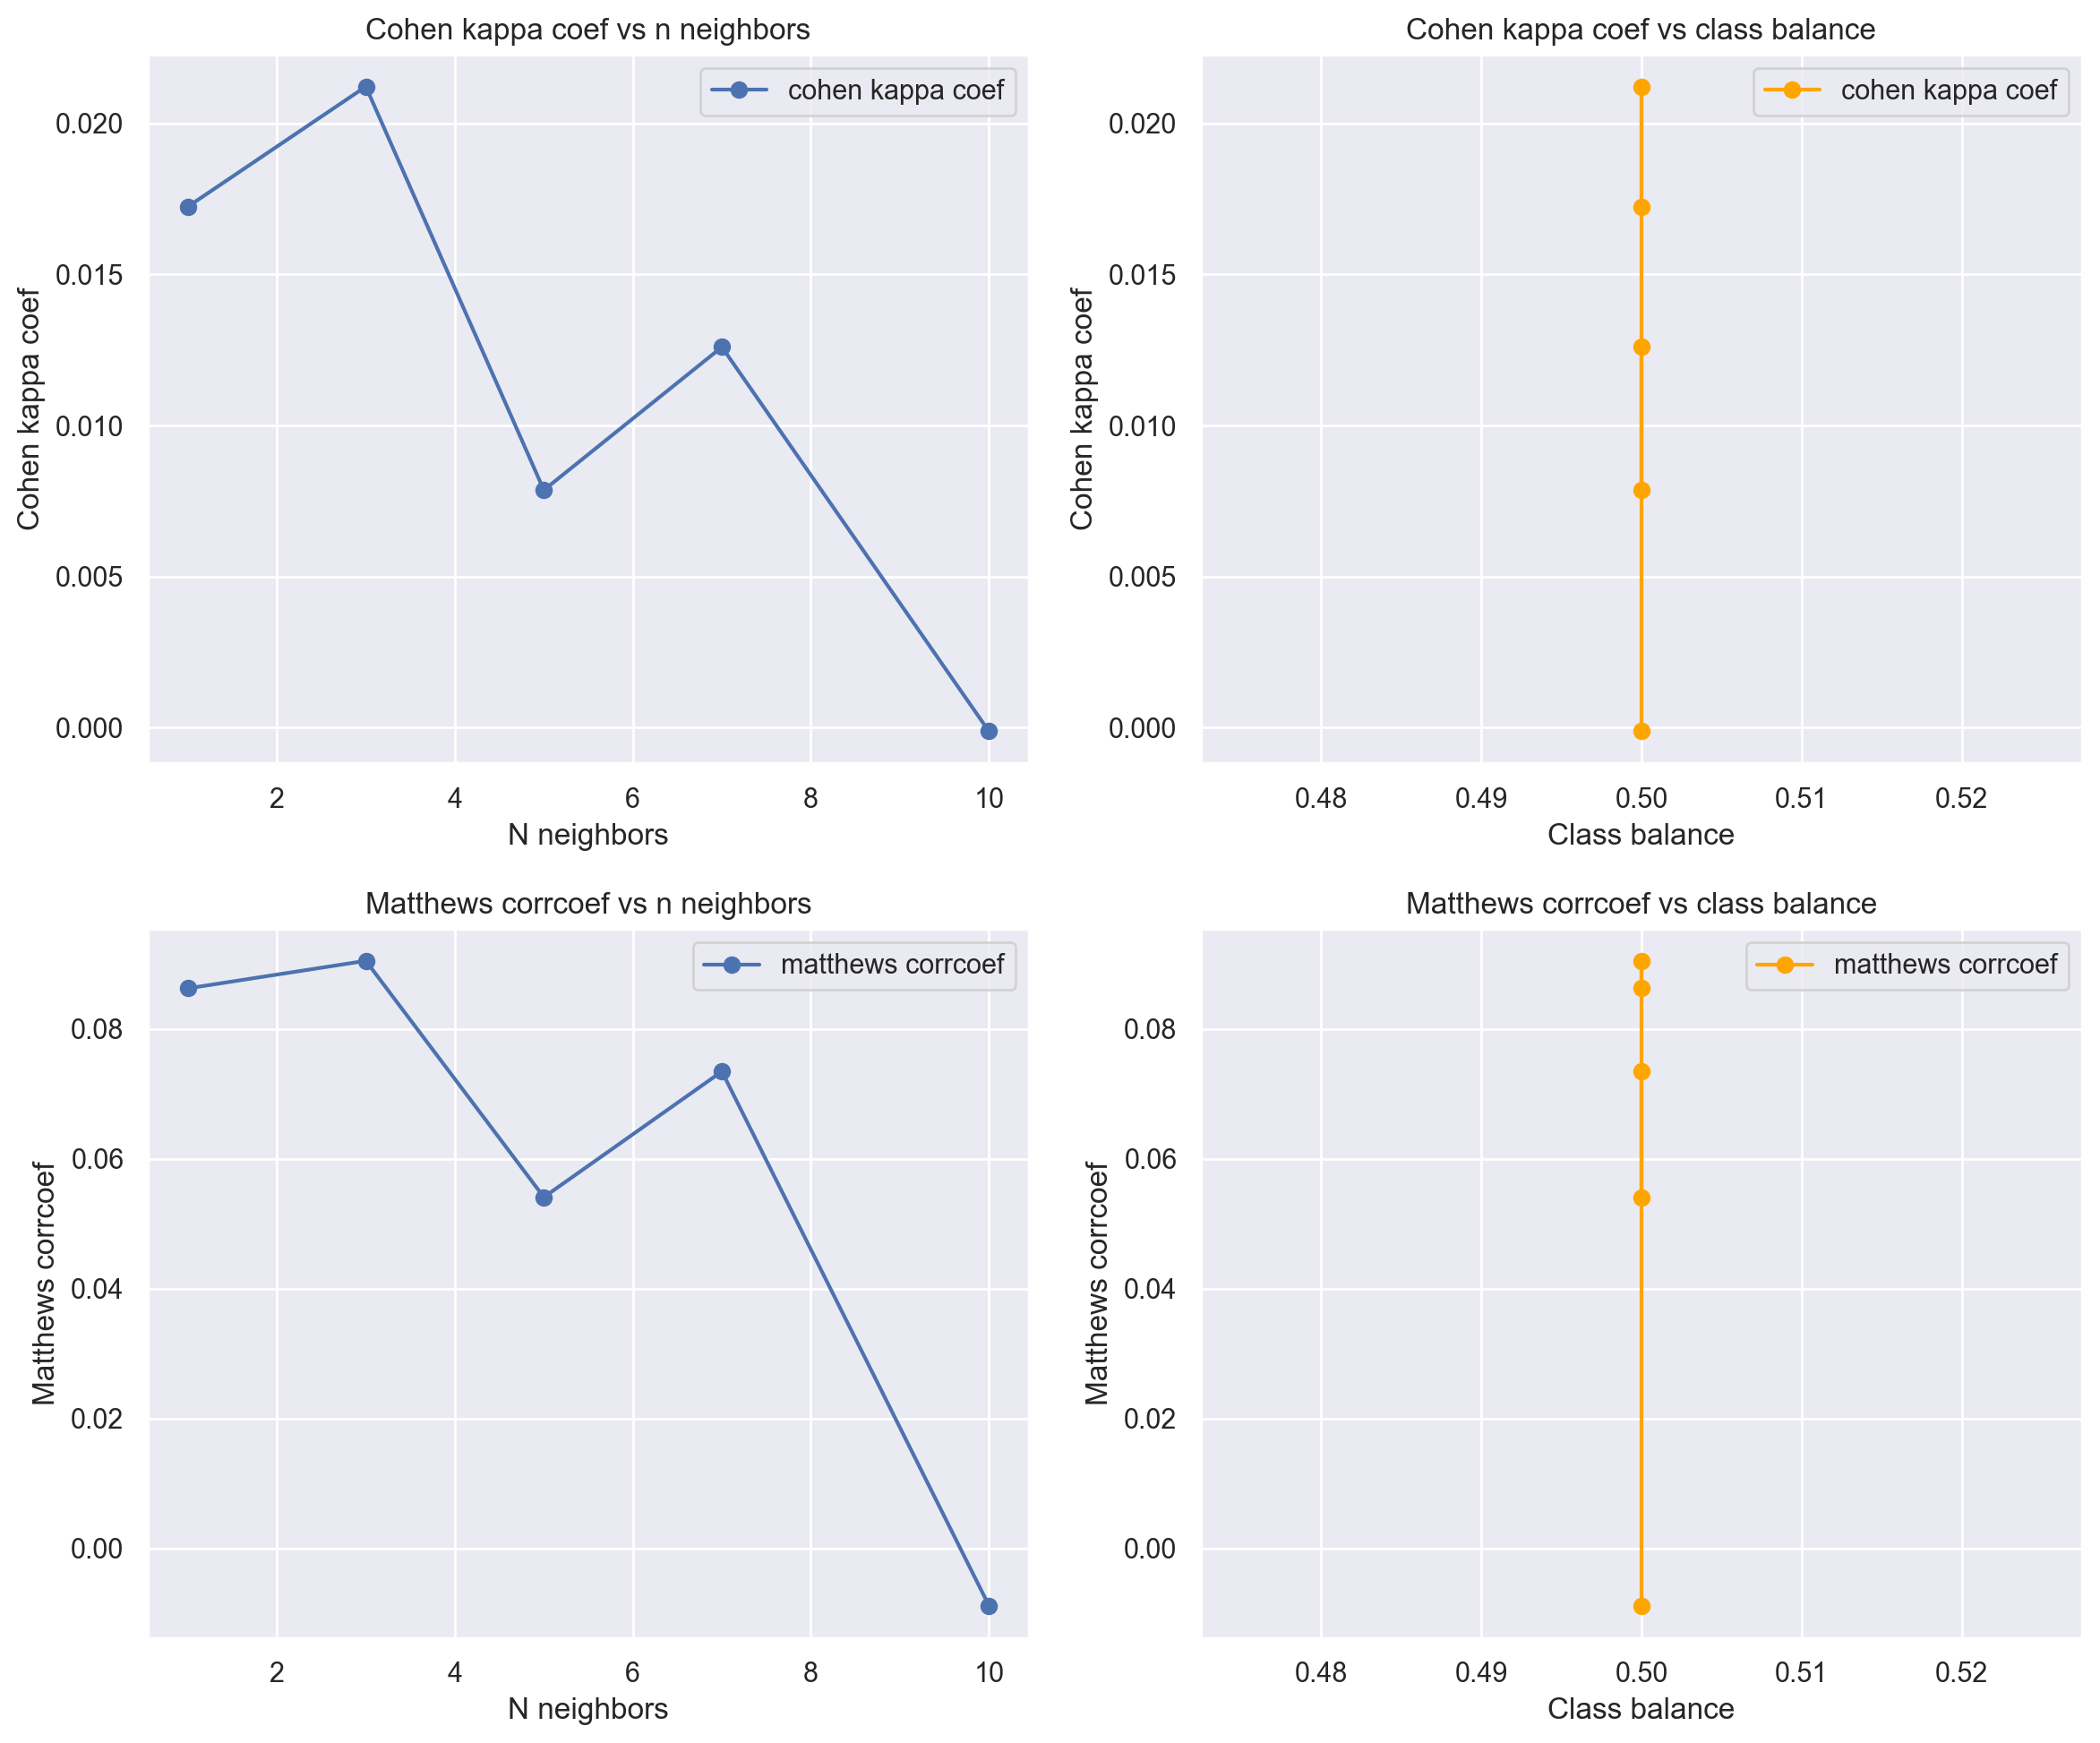

In [66]:
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(12, 10))

ax1[0].plot(results_df_1['n neighbors'], results_df_1['k'], marker='o', label='cohen kappa coef')
ax1[0].set_title('Cohen kappa coef vs n neighbors')
ax1[0].set_xlabel('N neighbors')
ax1[0].set_ylabel('Cohen kappa coef')
ax1[0].legend()

ax1[1].plot(results_df_1['class balance'], results_df_1['k'], marker='o', label='cohen kappa coef', color='orange')
ax1[1].set_title('Cohen kappa coef vs class balance')
ax1[1].set_xlabel('Class balance')
ax1[1].set_ylabel('Cohen kappa coef')
ax1[1].legend()


# --------------------------------------------------------------------------------------------------


ax2[0].plot(results_df_1['n neighbors'], results_df_1['m'], marker='o', label='matthews corrcoef')
ax2[0].set_title('Matthews corrcoef vs n neighbors')
ax2[0].set_xlabel('N neighbors')
ax2[0].set_ylabel('Matthews corrcoef')
ax2[0].legend()

ax2[1].plot(results_df_1['class balance'], results_df_1['m'], marker='o', label='matthews corrcoef', color='orange')
ax2[1].set_title('Matthews corrcoef vs class balance')
ax2[1].set_xlabel('Class balance')
ax2[1].set_ylabel('Matthews corrcoef')
ax2[1].legend()



plt.tight_layout()
plt.show()

**Бонус (1 балл)**. imblearn также предлагает много различных методов для андерсэмплинга. Выберите что-нибудь еще из предлагаемого на свой вкус, опишите идею метода и протестируйте его.

Мне показался интересным ClusterCentroids, так как в бонусе выше kmeans smote лучше остальных методов улучшил качество. Сначала мы применяем kmeans к мажоритарному классу, чтобы разделить его на N кластеров, затем вместо того, чтобы использовать все образцы мажоритарного класса, метод сохраняет только центроиды кластеров. , Получается, мы уменьшаем количество объектов мажоритарного класса, учитывая при этом распределение данных в мажоритарном классе.

In [67]:
from imblearn.under_sampling import ClusterCentroids

sampling_strategy_list = np.linspace(0.1, 1.0, 5)      # переберём разные соотношения миноритарного к мажоритарному классу послу ресэмплинга
results_2 = []

for strategy in sampling_strategy_list:
    cc = ClusterCentroids(sampling_strategy=strategy, random_state=42)
    X_res, y_res = cc.fit_resample(X_train, y_train)
    k, m = evaluate_model(X_res, y_res, X_test, y_test)

    original_size = len(y_train)
    resampled_size = len(y_res)
    balance = sum(y_res == 1) / len(y_res)      # отношение размера исходной выборки и пересэмплированной

    results_2.append((strategy, k, m, balance))

C:\Users\Настя\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Настя\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Настя\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Настя\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default 

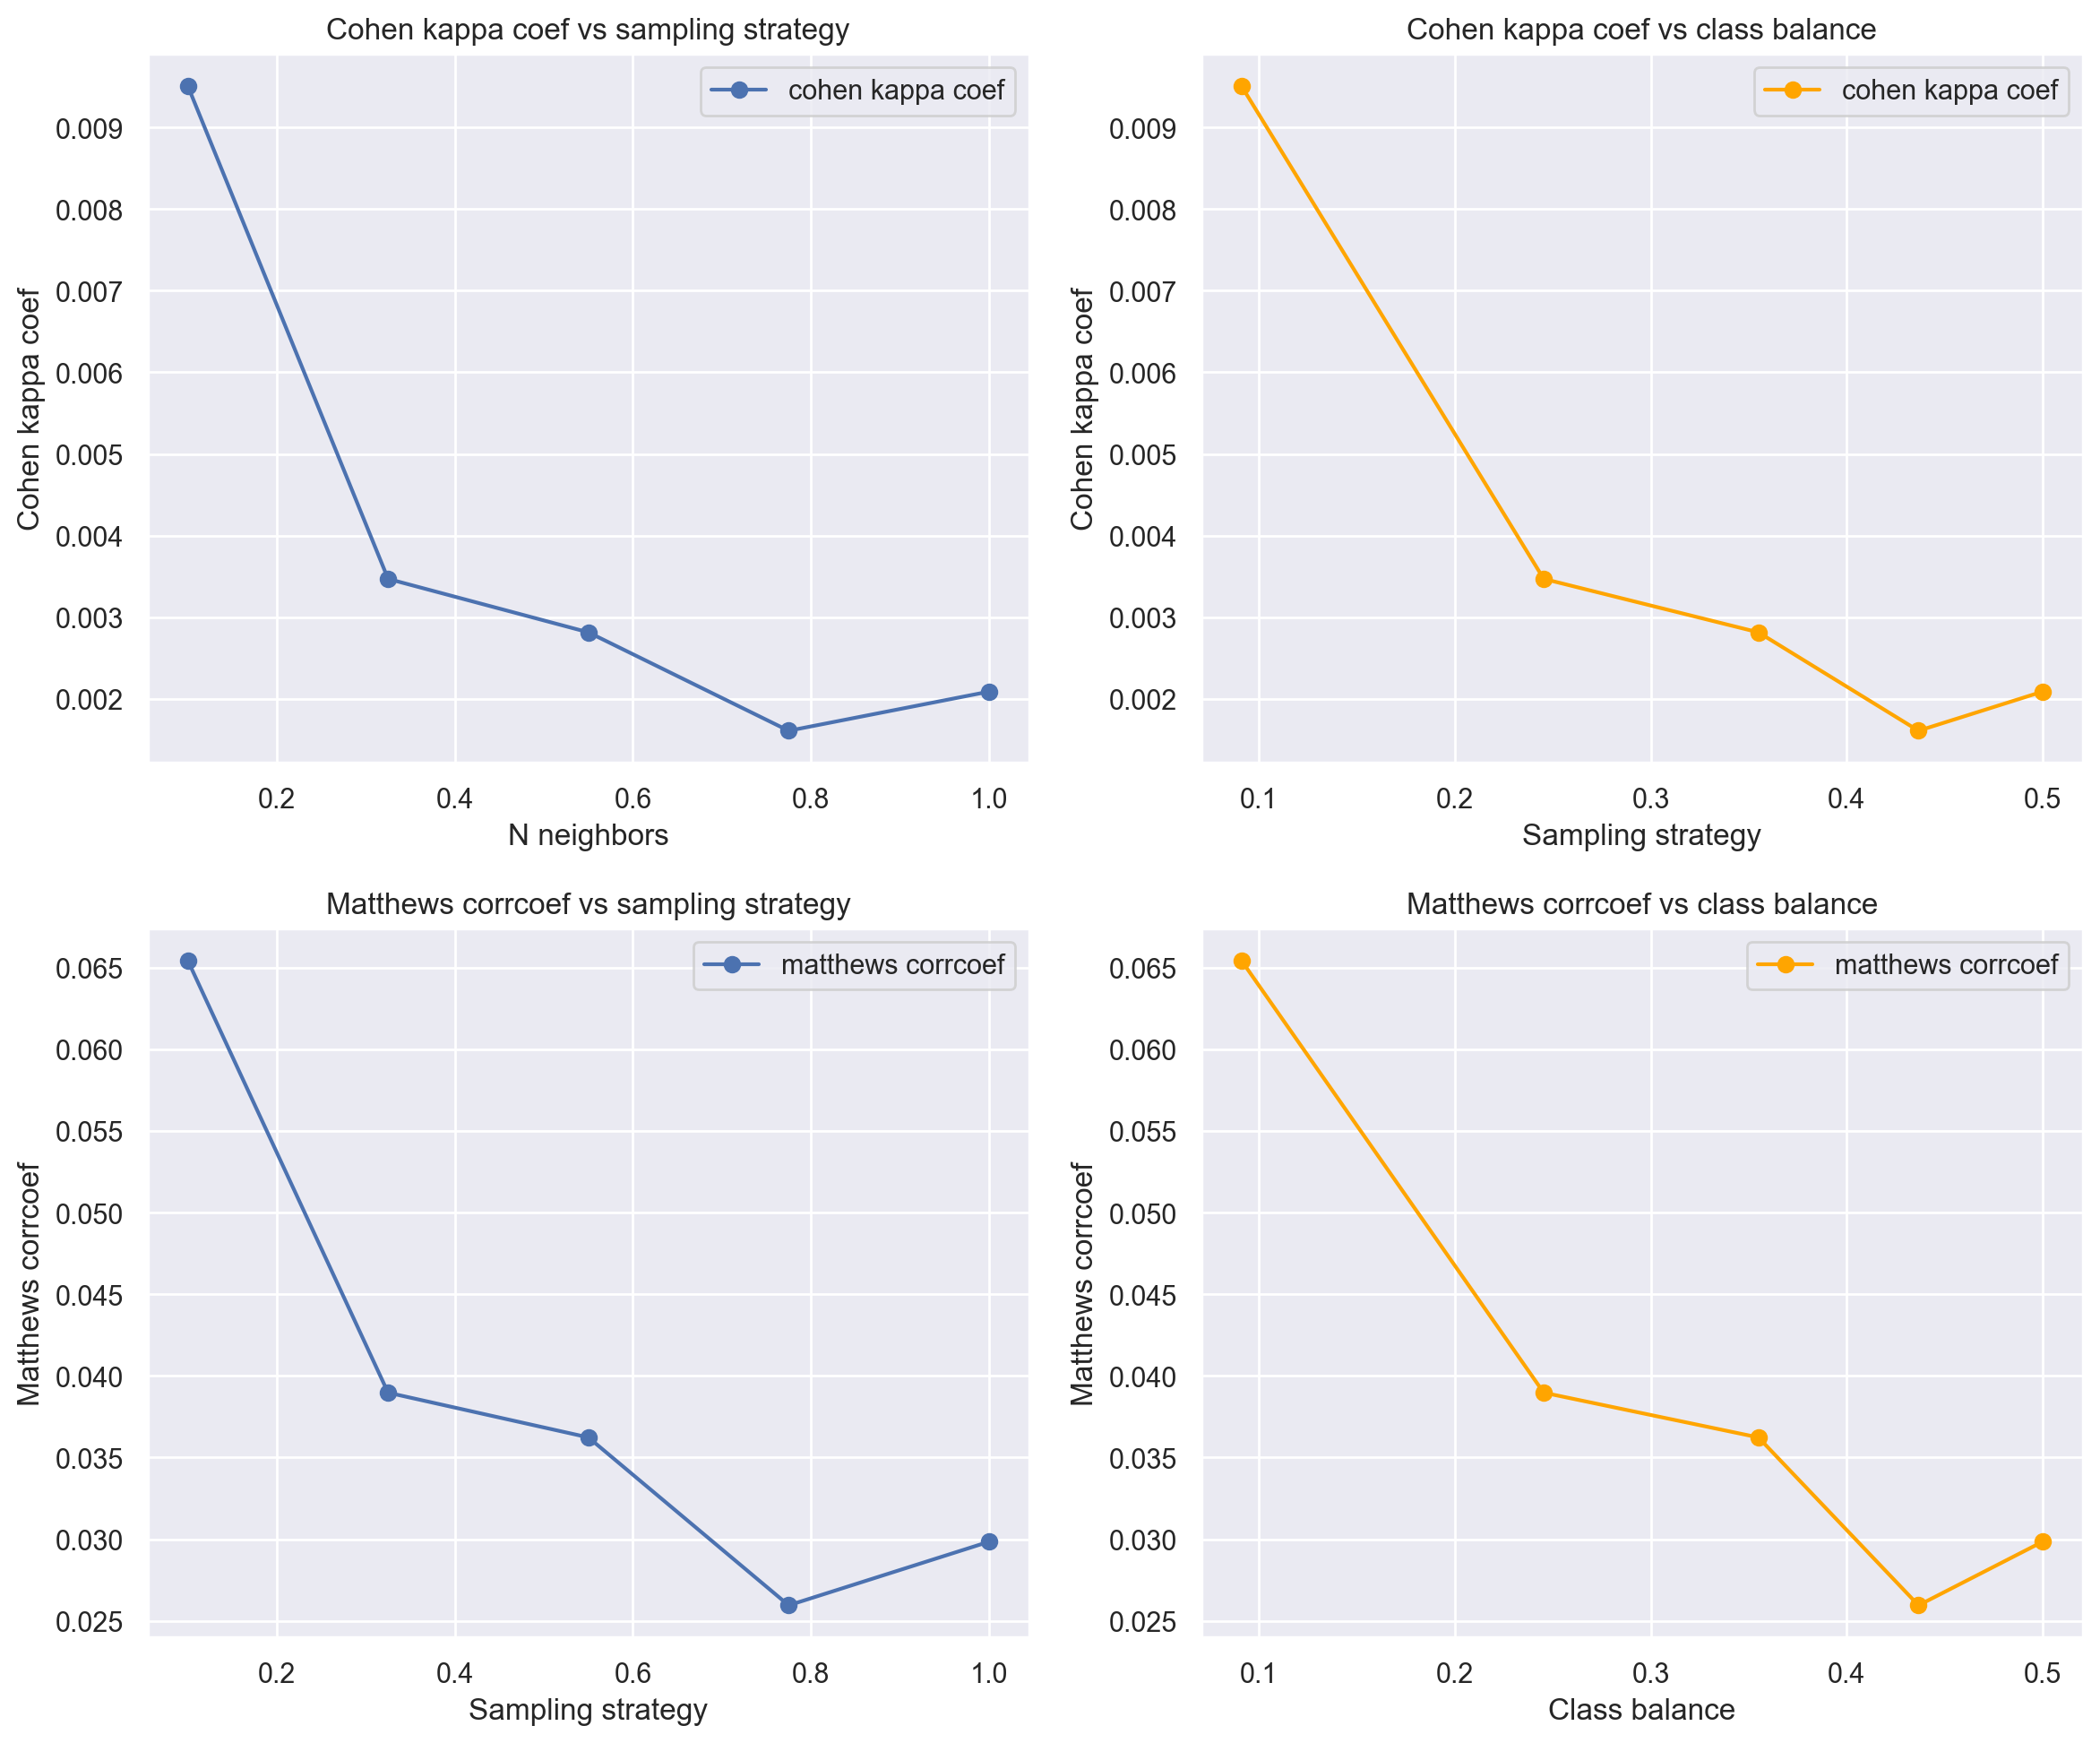

In [69]:
results_df_2 = pd.DataFrame(results_2, columns=['sampling strategy', 'k', 'm', 'class balance'])


fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(12, 10))


ax1[0].plot(results_df_2['sampling strategy'], results_df_2['k'], marker='o', label='cohen kappa coef')
ax1[0].set_title('Cohen kappa coef vs sampling strategy')
ax1[0].set_xlabel('N neighbors')
ax1[0].set_ylabel('Cohen kappa coef')
ax1[0].legend()

ax1[1].plot(results_df_2['class balance'], results_df_2['k'], marker='o', label='cohen kappa coef', color='orange')
ax1[1].set_title('Cohen kappa coef vs class balance')
ax1[1].set_xlabel('Sampling strategy')
ax1[1].set_ylabel('Cohen kappa coef')
ax1[1].legend()


# --------------------------------------------------------------------------------------------------


ax2[0].plot(results_df_2['sampling strategy'], results_df_2['m'], marker='o', label='matthews corrcoef')
ax2[0].set_title('Matthews corrcoef vs sampling strategy')
ax2[0].set_xlabel('Sampling strategy')
ax2[0].set_ylabel('Matthews corrcoef')
ax2[0].legend()

ax2[1].plot(results_df_2['class balance'], results_df_2['m'], marker='o', label='matthews corrcoef', color='orange')
ax2[1].set_title('Matthews corrcoef vs class balance')
ax2[1].set_xlabel('Class balance')
ax2[1].set_ylabel('Matthews corrcoef')
ax2[1].legend()



plt.tight_layout()
plt.show()

**Бонус (2 балла)**. Сможете ли вы с помощью комбинации любых методов оверсэмплинга, андерсэмплинга и классификации набрать 0.8 на всех трех метриках?

In [70]:
kmeans_smote = KMeansSMOTE(random_state=42, cluster_balance_threshold=0.001, k_neighbors=12, n_jobs=-1)

X_res, y_res =  kmeans_smote.fit_resample(X_train, y_train)
k, m = evaluate_model(X_res, y_res, X_test, y_test)

res_train_pool = Pool(data=X_res, label=y_res)
catboost_best = CatBoostClassifier()
catboost_best.fit(res_train_pool, eval_set=val_pool, verbose=False)

y_pred = catboost_best.predict(X_test)
y_val_proba = catboost_best.predict_proba(val_pool)[:, 1]

k = cohen_kappa_score(y_test, y_pred)
m_coef = matthews_corrcoef(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_val, y_val_proba)
auc_pr = auc(recall, precision)

print('Catboost cohen kappa coef: ', k)
print('Catboost matthews corrcoef: ', m_coef)
print('AUC-PR: ', auc_pr)

C:\Users\Настя\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Catboost cohen kappa coef:  0.8203918657407464
Catboost matthews corrcoef:  0.8272276618091001
AUC-PR:  0.8489738371692731


# Часть 2. Поиск аномалий. 

Как вы могли заметить, методы балансировки выборок очень часто могут привести к не самым лучшим результатам из-за того, что они по сути искажают информацию о реальном распределении данных - в реальности обычно требуется долгий подбор в принципе работоспособных для задачи методов и их аккуратная настройка. 

Теперь давайте попробуем слегка сменить постановку задачи и переключиться на задачу "одноклассовой" классификации, то есть - поиска *аномалий* в выборке. В общем-то, это вполне согласуется с нашей областью работы - мы действительно можем назвать мошеннические транзакции аномальньми (как интуитивно, так и на основании наблюдаемой балансировки данных). 

Стоит отметить, что методы обнаружения аномалий чаще всего относятся к классу методов обучения без учителя. Это дает некоторый положительный эффект - нам не обязательно нужно тратить время на разметку данных (тем не менее, для контроля качества какую-то часть разметить все-таки придется). Впрочем, чаще всего перфоманс таких методов оказывается заметно хуже, чем у честного обучения с учителем (если мы можем себе его позволить).



**Задание 4. (3 балла).** На занятиях вы разбирали схожий с Random Forest подход для детекции аномалий без известной разметки данных, называемый Isolation Forest. Напомним суть: на этапе обучения мы создаем ансамбль из решающих деревьев, в котором признак и порог на каждую вершину подбираются случайно. Затем мы считаем для объектов оценку аномальности через длину пути до соответствующего листа в каждом дереве.

В данном задании вам предлагается реализовать модификацию данного алгоритма, известную как Extended Isolation Forest. В ней мы на каждом шаге будем определять не порог для признака, а полноценную случайную гиперплоскость, разбивающую выборку на 2 части. С детальным описанием вы можете ознакомиться [здесь](https://arxiv.org/pdf/1811.02141.pdf).

Ниже приведен шаблон кода. Постарайтесь работать в его рамках (минорные изменения вполне допустимы, главное не переворачивайте всю структуру с ног на голову). 

**NB**: будем считать, что в нашем датасете нет категориальных признаков - можете не заморачиваться с их обработкой (но в общем случае, это будет важно).

**Советы**:
 - Численные признаки лучше предобработать надлежащим образом.
 - Возможно, вам поможет выбрасывание некоторых признаков.
 - Внимательно следите за знаками.
 - Не игнорируйте документирующие строки.
 - Вероятнее всего, вы не сможете приблизиться по качеству к supervised-решениям. Если у вас не получается это сделать (но вы уверены в своей правоте), не стоит тратить слишком много времени на поиск ошибок.



**Бонусы (каждый по 0.5)**:
- Сделайте ваш EIF параллельным (`multiprocessing`, `joblib`).
- Добавьте возможность откатиться к дефолтному варианту Isolation Forest. (порассуждайте, как можно реализовать это в данной модели?):


In [95]:
import math

def c_factor(n):
    """
    Computes average path length for an unsuccessful search in a binary search tree.
    Params:
        n: int - number of data points for BST      # количество узлов в дереве
    """
    # средняя длина пути от корня до узла, где бы поиск остановился, если искомый элемент отсутствует в дереве

    if n > 2:
        return math.log2(n)
    elif n == 2:
        return 1
    else:
        return 0


def calc_height(X, depth, node):
    """
    Calculates anomaly scores for sample in a recursive manner.
    Params:
        X: np.array - current sample, available to node
        
        depth: int - path length up to current node
        
        node: Node - current tree node
        
    Returns:
        scores: int, float or np.array - anomaly scores for sample
    """

    if node.kind == "external":     # если лист дерева (внешний узел)
        return depth + c_factor(node.size)      # возвращаем текущую глубину плюс поправочный коэффициент для числа элементов в узле

    # вычисляем разделяющую гиперплоскость
    decision_boundary = np.dot(X, node.w) - node.b
    left_mask = decision_boundary < 0       # раздляем точки не левое...
    right_mask = ~left_mask         # ...и правое поддерево

    scores = np.zeros(X.shape[0])       # создаём массив, который будет содержать длины путей для каждой точки из Х

    if node.left is not None:       # если есть левый дочерний узел...
        scores[left_mask] = calc_height(X[left_mask], depth + 1, node.left)         # ...вызываем функцию внутри функции (чтобы дойти до внешних узлов) 
                                                                                    # и увеличиваем глубину дерева на 1
    if node.right is not None:
        scores[right_mask] = calc_height(X[right_mask], depth + 1, node.right)

    return scores


class Node(object):
    """
    A single node object for each tree. Contains information on height, current data,
    splitting hyperplane and children nodes.
    
    Attributes:
        X: np.array - data available to current node
        size: int - length of available data
        
        depth: int - depth of node

        left: Node - left child
        right: Node - right child

        kind: str - either "internal" or "external", indicates the type of current node

        w: np.array - normal vector for the splitting hyperplane
        b: float - intercept term for the splitting hyperplane
    """
    def __init__(self, X, depth, left, right, kind, w, b):
        """
        Node(h, left, right, kind, w, b)
        Represents the node object.
        
        Params:
            X: np.array - data available to current node
            depth: int - depth of node
            
            left: Node - left child
            right: Node - right child
            
            kind: str - either "internal" or "external", indicates the type of current node
            
            w: np.array - normal vector for the splitting hyperplane
            b: float - intercept term for the splitting hyperplane
            
        """
        self.size = len(X)      # количеством элементов, содержащихся в узле (размер узла)
        
        self.depth = depth
        
        # ссылки на дочерние узлы
        self.left = left
        self.right = right
        
        self.kind = kind        # тип узла (внутренний или внешний)

        # параметры для гиперплоскости
        self.w = w          # нормальный вектор гиперплоскости
        self.b = b          # смещение
    
    def __repr__(self):
        """
        For convenience only.
        """
        # возвращает строку с информацией о размере, глубине и типе узла
        return f"Node(size={self.size}, depth={self.depth}, kind={self.kind})"

class RandomizedTree(object):
    """
    Single randomized tree object. Stores root and its depth (tree is built recursively).
    Attributes:
        depth: int - current tree depth
        
        max_depth: int - maximum tree depth
        
        root: Node - root node 

        internal_count: int - number of internal nodes

        external_count: int - number of external nodes
        
    """
    def __init__(self, X, max_depth):
        """
        Single randomized tree object. Stores root and its depth (tree is built recursively).
        Params:
            X: np.array - train sample
            max_depth: int - maximum tree depth

        """
        self.depth = 0
        self.max_depth = max_depth
        
        # счётчики узлов
        self.internal_count = 0
        self.external_count = 0

        self.root = self.grow(X, 0)     # корневой узел
        
    def __repr__(self):
        """
        For convenience only.
        """
        return f"RandomizedTree(depth={self.depth}, max_depth={self.max_depth}, n_internal={self.internal_count}, n_external={self.external_count})"
        
        
    def grow(self, X, depth):
        """
        Grow tree in a recursive manner.
        Params:
            X: np.array - available train sample
            
            depth: int - current tree depth
            
        Returns:
            node: Node - a trained node with separating hyperplane data.
                         Node provides access to children if necessary (these are built recursively)
        """
        # ссоздаём узлы и разделяем данные по случайным гиперплоскостям (рекурсивно, т.е. функция вызывает сама себя)

        if depth >= self.max_depth or len(X) <= 1:      # если достигли макс. глубины или меньше двух элементов в листе
            self.external_count += 1                  # увеличиваем счётчик внешних услов
            return Node(X, depth, None, None, 'external', None, None)       # и создаём внешний узёл дерева

        w = np.random.randn(X.shape[1])         # инициализируем по количеству признаков
        w /= np.linalg.norm(w)          # нормализуем вектор
        b = np.random.uniform(np.min(np.dot(X, w)), np.max(np.dot(X, w)))       # случайным образом определяем смещение

        # делим данные по гиперплоскости
        left_mask = np.dot(X, w) < b
        right_mask = ~left_mask

        # создаём дочерние узлы (рекурсивно)
        left = self.grow(X[left_mask], depth + 1)       # и увеличиваем глубину на 1
        right = self.grow(X[right_mask], depth + 1)

        self.internal_count += 1        # увеличиваем счётчик внутренних узлов на 1
        return Node(X, depth, left, right, 'internal', w, b)          # создаём внутренний узел с дочерними узлами и гиперплоскостью


    def score_samples(self, X):
        """
        Calculate anomaly scores for given data. You may utilize outer function `calc_height`.
        Params:
            X: np.array - data to be evaluated
            
        Returns:
            scores: np.array - estimated anomaly scores
        """
        # оценивает аномальность данных
        return calc_height(X, 0, self.root)
        
    
class ExtendedIsolationForest(object):
    """
    Extended Isolation Forest object. Stores training data and trained randomized trees.
    Attributes:
        n_trees: int - number of Randomized Trees
        
        max_depth: int - maximum depth of each tree
        
        subsample_rate: float - draw `subsample_rate * X.shape[0]` samples for each tree
        
        trees: list - container for trained trees 
        
        contamination: float - estimated fraction of anomaly samples in data. Used for thresholding
        
    """
    
    def __init__(self, n_trees, subsample_rate, max_depth=None, contamination=0.01):
        """
        Extended Isolation Forest object. Stores training data and trained randomized trees.
        Params:
            n_trees: int - number of Randomized Trees

            subsample_rate: float - draw `subsample_rate * X.shape[0]` samples for each tree

            max_depth: int or None - maximum depth of each tree. Defaults to ceil(log_2(subsample_size)) if not provided

            contamination: float - estimated fraction of anomaly samples in data. Used for thresholding

        """
        self.n_trees = n_trees          # количество деревьев в ансамбле
        self.max_depth = max_depth
        self.subsample_rate = subsample_rate          # какая доля данных исп. для построения каждого дерева
        self.trees = []                    # хренение деревьев
        self.contamination = contamination          # оценочная доля аномальных в данных
        self.is_fit = False
        
    def __repr__(self):
        """For convenience only."""
        
        return f"ExtendedIsolationForest(n_trees={self.n_trees}, max_depth={self.max_depth}, subsample_rate={self.subsample_rate}, contamination={self.contamination}, is_fit={self.is_fit})"
        
    def fit(self, X):
        """
        Fit EIF to new data.
        Params:
            X: np.array - 2d array of samples
        """
        n_samples = X.shape[0]
        subsample_size = int(self.subsample_rate * n_samples)          # размер подвыборки для каждого дерева

        # оюучаем на случайной подвыборке данных размера subsample_size n_trees деревьев
        self.trees = [RandomizedTree(X[np.random.choice(n_samples, subsample_size, replace=False)], self.max_depth) for _ in range(self.n_trees)]
        self.is_fit = True

        return self
    
    def score_samples(self, X):
        """
        Estimate (normalized) anomaly score for each given sample
        Params:
            X: np.array - new samples

        Returns:
            scores: np.array - anomaly scores (larger value means higher probability of a sample being an outlier)
        """
        if not self.is_fit:
            raise ValueError("Model is not fit yet. Call `fit` before `score_samples`.")
        
        scores = np.zeros(X.shape[0])
        for tree in self.trees:
            scores += tree.score_samples(X)
        
        scores /= self.n_trees          # средняя оценка
        scores = 2 ** (-scores / c_factor(X.shape[0]))          # формула из лекции
        return scores

    
    def predict(self, X):
        """
        Predict if given samples are outliers.
        Params:
            X: np.array - new samples

        Returns:
            labels: np.array - anomaly labels (1 for outliers, 0 for inliers)
        """
        scores = self.score_samples(X)
        # threshold = 0.5 - было совсем грустно, заменила на:
        threshold = np.percentile(scores, 100 * (1 - self.contamination))
        labels = (scores >= threshold).astype(int)

        return labels

**Задание 5. (1 балл).** Протестируйте вашу реализацию EIF и подберите оптимальные гиперпараметры (наш метод не использует разметку, поэтому можете попробовать делать это на обучающей выборке). Сравните ее с обычным IF из `sklearn` (желательно делать это на одних и тех же параметрах). Удалось ли сделать лучше?

_Посмотрим, на каком шаге моя реализация сломается_ =D

In [96]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [97]:
eif = ExtendedIsolationForest(n_trees=100, subsample_rate=0.8, max_depth=10)
eif.fit(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
y_pred_eif = eif.predict(X_test_scaled)

k = cohen_kappa_score(y_test, y_pred_eif)
m_coef = matthews_corrcoef(y_test, y_pred_eif)

print('Catboost cohen kappa coef: ', k)
print('Catboost matthews corrcoef: ', m_coef)

Catboost cohen kappa coef:  0.06380385805685458
Catboost matthews corrcoef:  0.12417951855938668


In [94]:
from sklearn.ensemble import IsolationForest

iforest = IsolationForest(n_estimators=100, contamination=0.01)
iforest.fit(X_train_scaled)
y_pred_if = iforest.predict(X_test_scaled)

y_pred_if = np.where(y_pred_if == -1, 1, 0)      # преобразовываем прдсказания -1 и 1 в 0 и 1

k = cohen_kappa_score(y_test, y_pred_if)
m_coef = matthews_corrcoef(y_test, y_pred_if)

print('Catboost cohen kappa coef: ', k)
print('Catboost matthews corrcoef: ', m_coef)

Catboost cohen kappa coef:  0.05024972414193188
Catboost matthews corrcoef:  0.0982446383058126


Возможно, ваш алгоритм выдал большие оценки объектам с негативной разметкой. Постарайтесь выбрать несколько таких объектов и доступно объяснить (= с кодом и графиками), почему так вышло:

_Поищем объекты в тестовом наборе, которые получили высокие оценки аномальности от EIF, но были размечены как нормальные._

In [98]:
scores_eif = eif.score_samples(X_test_scaled)           # оценки аномальности для тестовых данных
scores_if = iforest.decision_function(X_test_scaled)

threshold = np.percentile(scores_eif, 100 * (1 - eif.contamination))
# индексы объектов с высокими оценками аномальности и отрицательной разметкой
high_score_indices = np.where((scores_eif >= threshold) & (y_test == 0))[0]

[[ 1.99331465 -5.2568997   5.27801237 ... -0.32328891  1.32028388
   1.09951804]
 [ 1.99974405 -3.59278866  3.76188219 ... -0.35941627  1.32028388
   1.09951804]
 [ 2.00090843 -5.95333362  5.48774207 ... -0.20879912  1.32028388
   1.09951804]
 ...
 [ 2.36923211 -6.11265212  5.90261031 ... -0.31969613  1.32028388
   1.79981026]
 [ 2.37267462 -6.40581503  6.15301652 ... -0.32316915  1.32028388
   1.79981026]
 [ 2.37287712 -6.07876527  6.08303024 ... -0.35949611  1.32028388
   1.79981026]]


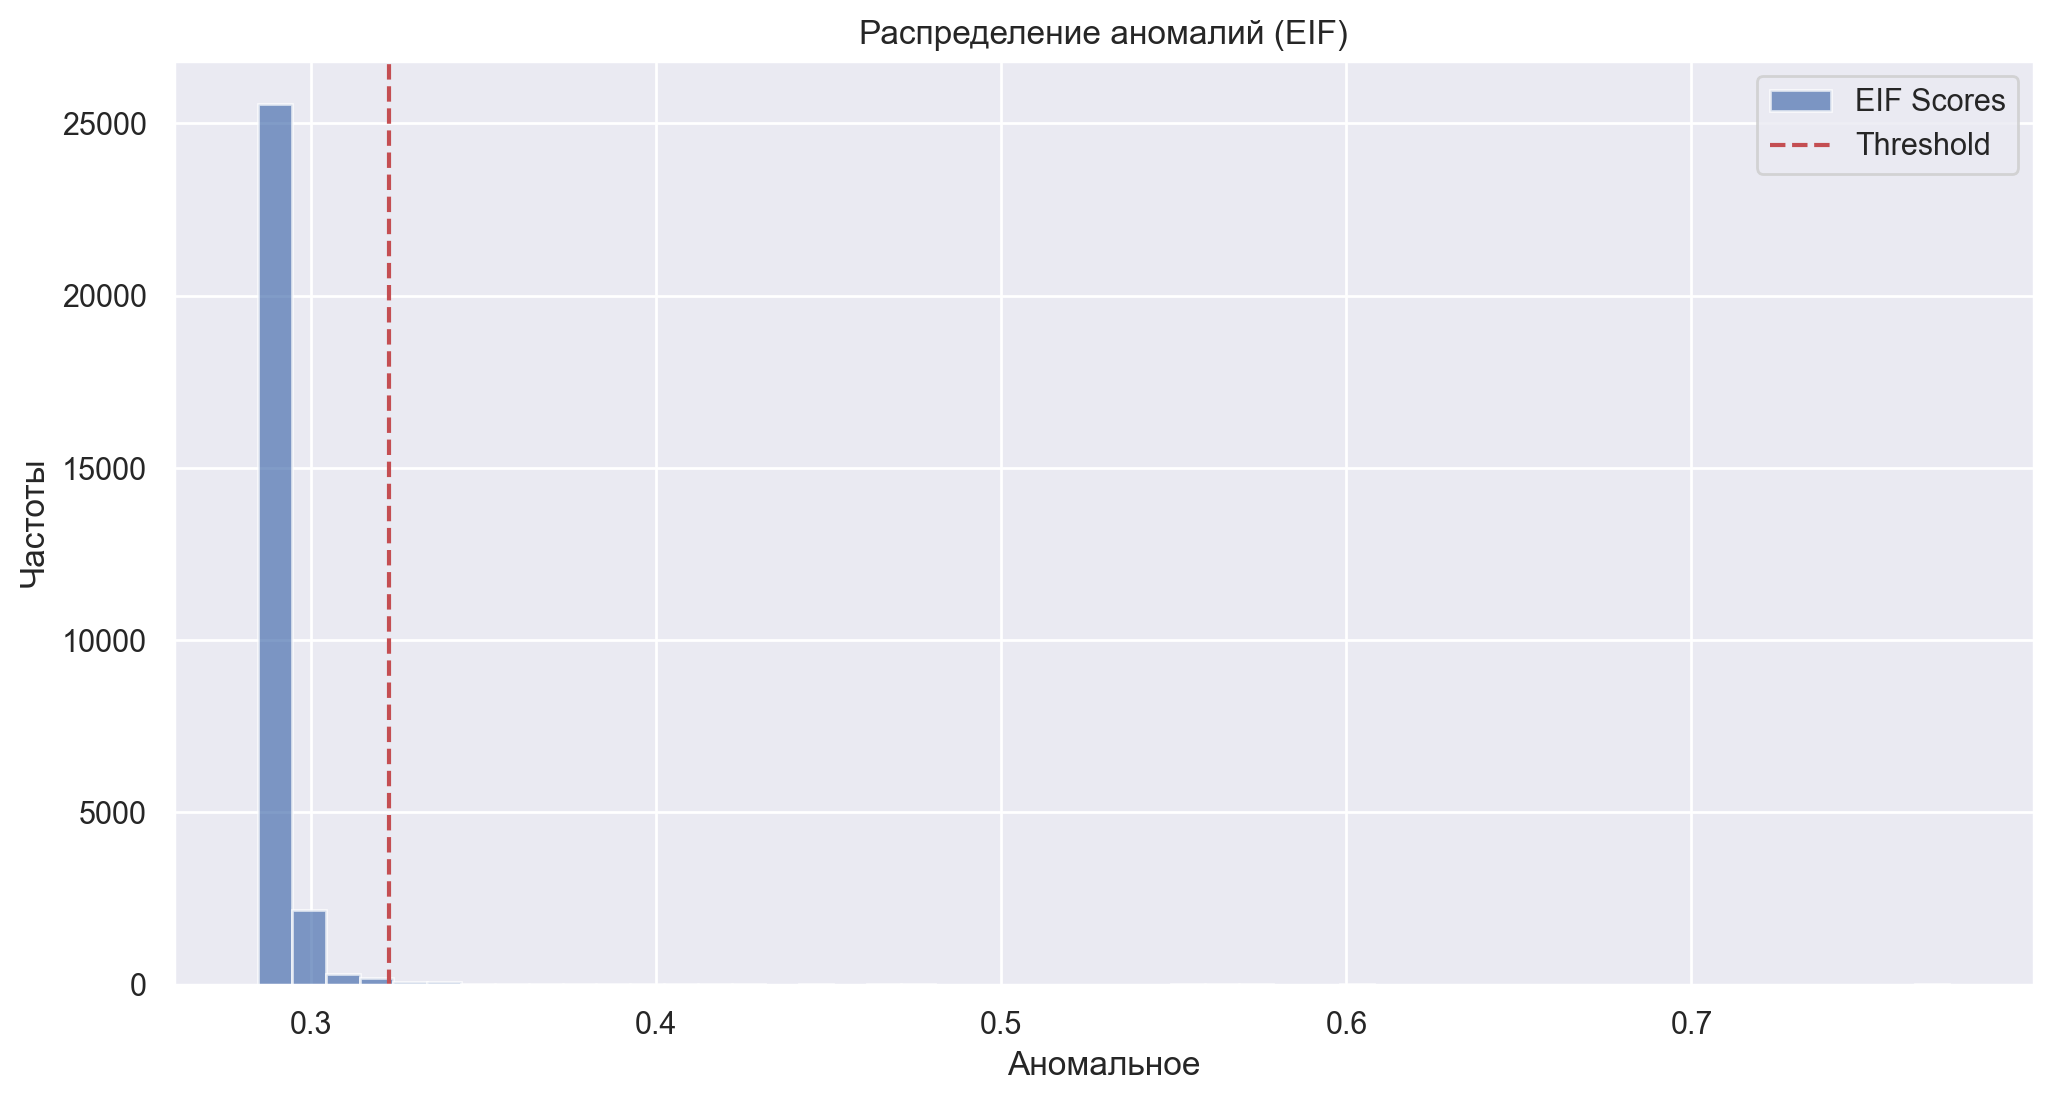

In [101]:
high_score_objects = X_test_scaled[high_score_indices]
print(high_score_objects)

plt.figure(figsize=(12, 6))
plt.hist(scores_eif, bins=50, alpha=0.7, label='EIF Scores')
plt.axvline(threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Аномальное')
plt.ylabel('Частоты')
plt.title('Распределение аномалий (EIF)')
plt.legend()
plt.show()

_Вроде таких объектов особо нет?..._

**Задание 6. (1 балл).** `sklearn` также предлагает нам и другие методы для поиска аномалий. В этом задании мы предлагаем вам сделать следующее:

Для начала попробуйте использовать методы Local Outlier Factor и One-Class SVM. Сравните результаты с IF и EIF.  

In [122]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

lof_model = LocalOutlierFactor(n_neighbors=20, contamination=0.01, novelty=True)
lof_predictions = lof_model.fit(X_train_scaled)

In [124]:
y_pred_lof = lof_model.predict(X_test_scaled)
y_pred_lof = np.where(y_pred_lof == -1, 1, 0)

k = cohen_kappa_score(y_test, y_pred_lof)
m_coef = matthews_corrcoef(y_test, y_pred_lof)

print('Catboost cohen kappa coef: ', k)
print('Catboost matthews corrcoef: ', m_coef)

Catboost cohen kappa coef:  -0.0011374400500486735
Catboost matthews corrcoef:  -0.009413878655875346


In [125]:
ocsvm_model = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.01)
ocsvm_model.fit(X_train_scaled)

ocsvm_predictions = ocsvm_model.predict(X_test_scaled)
y_pred_ocsvm = np.where(ocsvm_predictions == 1, 0, 1)

k = cohen_kappa_score(y_test, y_pred_ocsvm)
m_coef = matthews_corrcoef(y_test, y_pred_ocsvm)

print('Catboost cohen kappa coef: ', k)
print('Catboost matthews corrcoef: ', m_coef)


Catboost cohen kappa coef:  0.006010767447729997
Catboost matthews corrcoef:  0.05175911788276692


_Да, у меня началась дипрессия из-за плохих метрик..._

У вас началась депрессия из-за плохих метрик? Не беда! Сейчас давайте сделаем так: все методы, опробованные в этой части, попробуем задействовать для создания дополнительных признаков в данных. Проделайте это (не забудьте, что обучаться здесь нужно на трейне). Теперь возьмите лучшую модель из предыдущей части и обучите на новых данных. Смогли ли unsupervised-методы повысить вам качество?

In [52]:
#наверное, попробую, но кже после дедлайна ахаха

**Бонус. (0.1 балла).**

При сдаче проверяющий запустит следующую клетку один раз. Если она даст положительный результат, вы получите 0.1 бонусных балла. Если она даст отрицательный результат, вы получите -0.1 бонусных балла. 

Если вы хотите отказаться от сдачи данного задания, допишите "хочу" после двоеточия: `Хочу`

Ниже вы можете попрактиковаться и оценить ваши силы (изменять код ячейки запрещается!)

In [118]:
import random

rng = random.SystemRandom(0)
rng.uniform(-1.0, 1.0)

-0.6173287213975127